# Lista de Tópicos de Física Teórica

In [6]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from math import  erf, sqrt, pi
N = 1_000_000

def hist(bins, valores):
    bins = 100
    maximo = max(valores)
    minimo = min(valores)
    delta = (maximo - minimo)/bins
    histograma = [0]*(bins+1)
    for valor in valores:
        histograma[int((valor - minimo)/delta)] += 1
    histograma  = [x/N for x in histograma]
    return histograma,[minimo + i*delta for i in range(bins+1)]
def V(x):
    return pow(x,4) - 4*pow(x,2)
def dV(x):
    return 4*pow(x,3) - 8*x
def random_normal(D):
    return random.gauss(0, 2*D)
def Q4(N,d):
    points = np.random.rand(N, d)
    # square module of the points
    module = np.linalg.norm(points, axis=1)
    module = np.power(module, 2)
    f = np.exp(-module)
    Real = 0.7468**d
    Result = np.mean(f)
    MEAN_ERROR = np.std(f)/np.sqrt(N)
    Error = np.abs(Real - Result)/Real
    return Error,MEAN_ERROR,Result
def P(x, norm):
    return norm*(1 + np.cos(x)*np.cos(x))
def F(x):
    return (1 + np.cos(x)*np.cos(x))
def empirical_cdf(data, x):

    return np.searchsorted(data, x, side='right') / len(data)
def ks_test_from_histogram(sample1, sample2, bin_edges):

    # Calcular ECDF do histograma normalizado
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centros dos bins
    ecdf1 = np.cumsum(sample1 * np.diff(bin_edges))  # ECDF do histograma

    # Calcular CDF teórica a partir de sample2
    cdf2 = np.cumsum(sample2 * np.diff(bin_edges))  # CDF teórica

    # Normalizar ambas as CDFs
    ecdf1 /= ecdf1[-1]
    cdf2 /= cdf2[-1]

    # Calcular a estatística D
    d_statistic = np.max(np.abs(ecdf1 - cdf2))

    # Aproximação do valor-p
    n1 = len(sample1)
    n2 = len(sample2)
    n_eff = (n1 * n2) / (n1 + n2)
    p_value = 2 * np.exp(-2 * (d_statistic ** 2) * n_eff)

    return d_statistic, p_value
def chi2_cdf(x, k, terms=100):
    if k % 2 != 0:
        raise ValueError("Este método suporta apenas graus de liberdade pares.")
    
    # Calcular a função gama completa para k/2
    
    # Aproximar a CDF usando uma série
    cdf = 0
    for n in range(terms):
        # Logaritmo do termo
        log_term = n * math.log(x / 2) - (x / 2) - math.log(math.factorial(n))
        # Exponencial do logaritmo
        cdf += math.exp(log_term)

    return cdf

# Função da Energia
def E(x):
    E = (k*x**2)/2
    return E
# Função de boltzman
def Pb(x):
    F = np.exp(-beta*E(x))
    return F
# Função da distribuição teórica para a energia
def P_t(x):
    coef = np.sqrt(beta * k /(2*np.pi))
    return coef * Pb(x)
# Função "g", para o método da rejeição 
def g(x):
    return 1/E(x_max) if 0 <= E(x) <= E(x_max) else 0


# Função do método da rejeição
def r_sampling(n_samples):
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(-10,10)
        u = np.random.uniform(0,1)
        if u <= Pb(x)/(M*g(x)):
            samples.append(x)
    return np.array(samples)

# Função do histograma, será utilizado nas demais questões
def histograma_manual(dados, bins, densidade=False):
    
    # Determinar os limites do histograma
    minimo = np.min(dados)
    maximo = np.max(dados)
    limites = np.linspace(minimo, maximo, bins + 1)  # Criar os limites dos bins
    
    # Inicializar o array de contagem
    hist = np.zeros(bins)
    
    # Contar os dados em cada bin
    for valor in dados:
        # Identificar o índice do bin correspondente
        idx = np.searchsorted(limites, valor, side='right') - 1
        if idx >= 0 and idx < bins:
            hist[idx] += 1
    
    if densidade:
        # Calcular a densidade de probabilidade
        largura_bin = limites[1] - limites[0]
        hist = hist / (np.sum(hist) * largura_bin)
    
    return hist, limites



# Problema 1

Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de energia.

Considere a distribuição de Boltzmann para o problema do oscilador harmônico clássico:

$P(x) \propto e^{-\beta E(x)}, \quad \text{com} \quad E(x) = \frac{1}{2}kx^2$,

onde $\beta = \frac{1}{k_B T}$, $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma^2 = \frac{1}{\beta k}$.

1. **(a)** Gere valores aleatórios de $x$ a partir de uma distribuição uniforme e aceite-os com probabilidade proporcional a $P(x)$ (método de rejeição). Assim, obtém-se uma amostra de valores de $x$ que devem refletir a distribuição de Boltzmann.

2. **(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica.

3. **(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:

   $P_{\text{teórica}}(x) = \sqrt{\frac{\beta k}{2\pi}} \exp\left(-\frac{\beta k x^2}{2}\right).$

4. **(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:

   $\mathbb{E}[x] = 0, \quad \text{Var}(x) = \frac{1}{\beta k}.$

5. **(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras são consistentes com a distribuição teórica.

6. **(f)** Crie um Q-Q plot para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a distribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a variância, bem como os testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas da qualidade da aproximação Monte Carlo à solução analítica.


In [7]:
kb = 1.38e-23
T = 300
beta = 1
x_max = 10
x_min = -10
k = 1
M = 50

- a) Gerando valores aleatórios de $x$, a partir de uma distribuição uniforme, os aceites são proporcionais a $P(x)$, de acordo com a função " <span style="color:red;">r_sampling</span>  "

In [3]:
# Número de amostras
n_samples = 1e6

# Amostras
samples = r_sampling(n_samples)

- b), c) e f) Criando um <span style="color:blue;">histograma normalizado</span> dos valores simulados de $x$ e comparando com a curva teórica da distribuição de <span style="color:red;">Boltzman </span> dada por:

$P_{\text{teórica}}(x) = \sqrt{\frac{\beta k}{2\pi}} \exp\left(-\frac{\beta k x^2}{2}\right).$

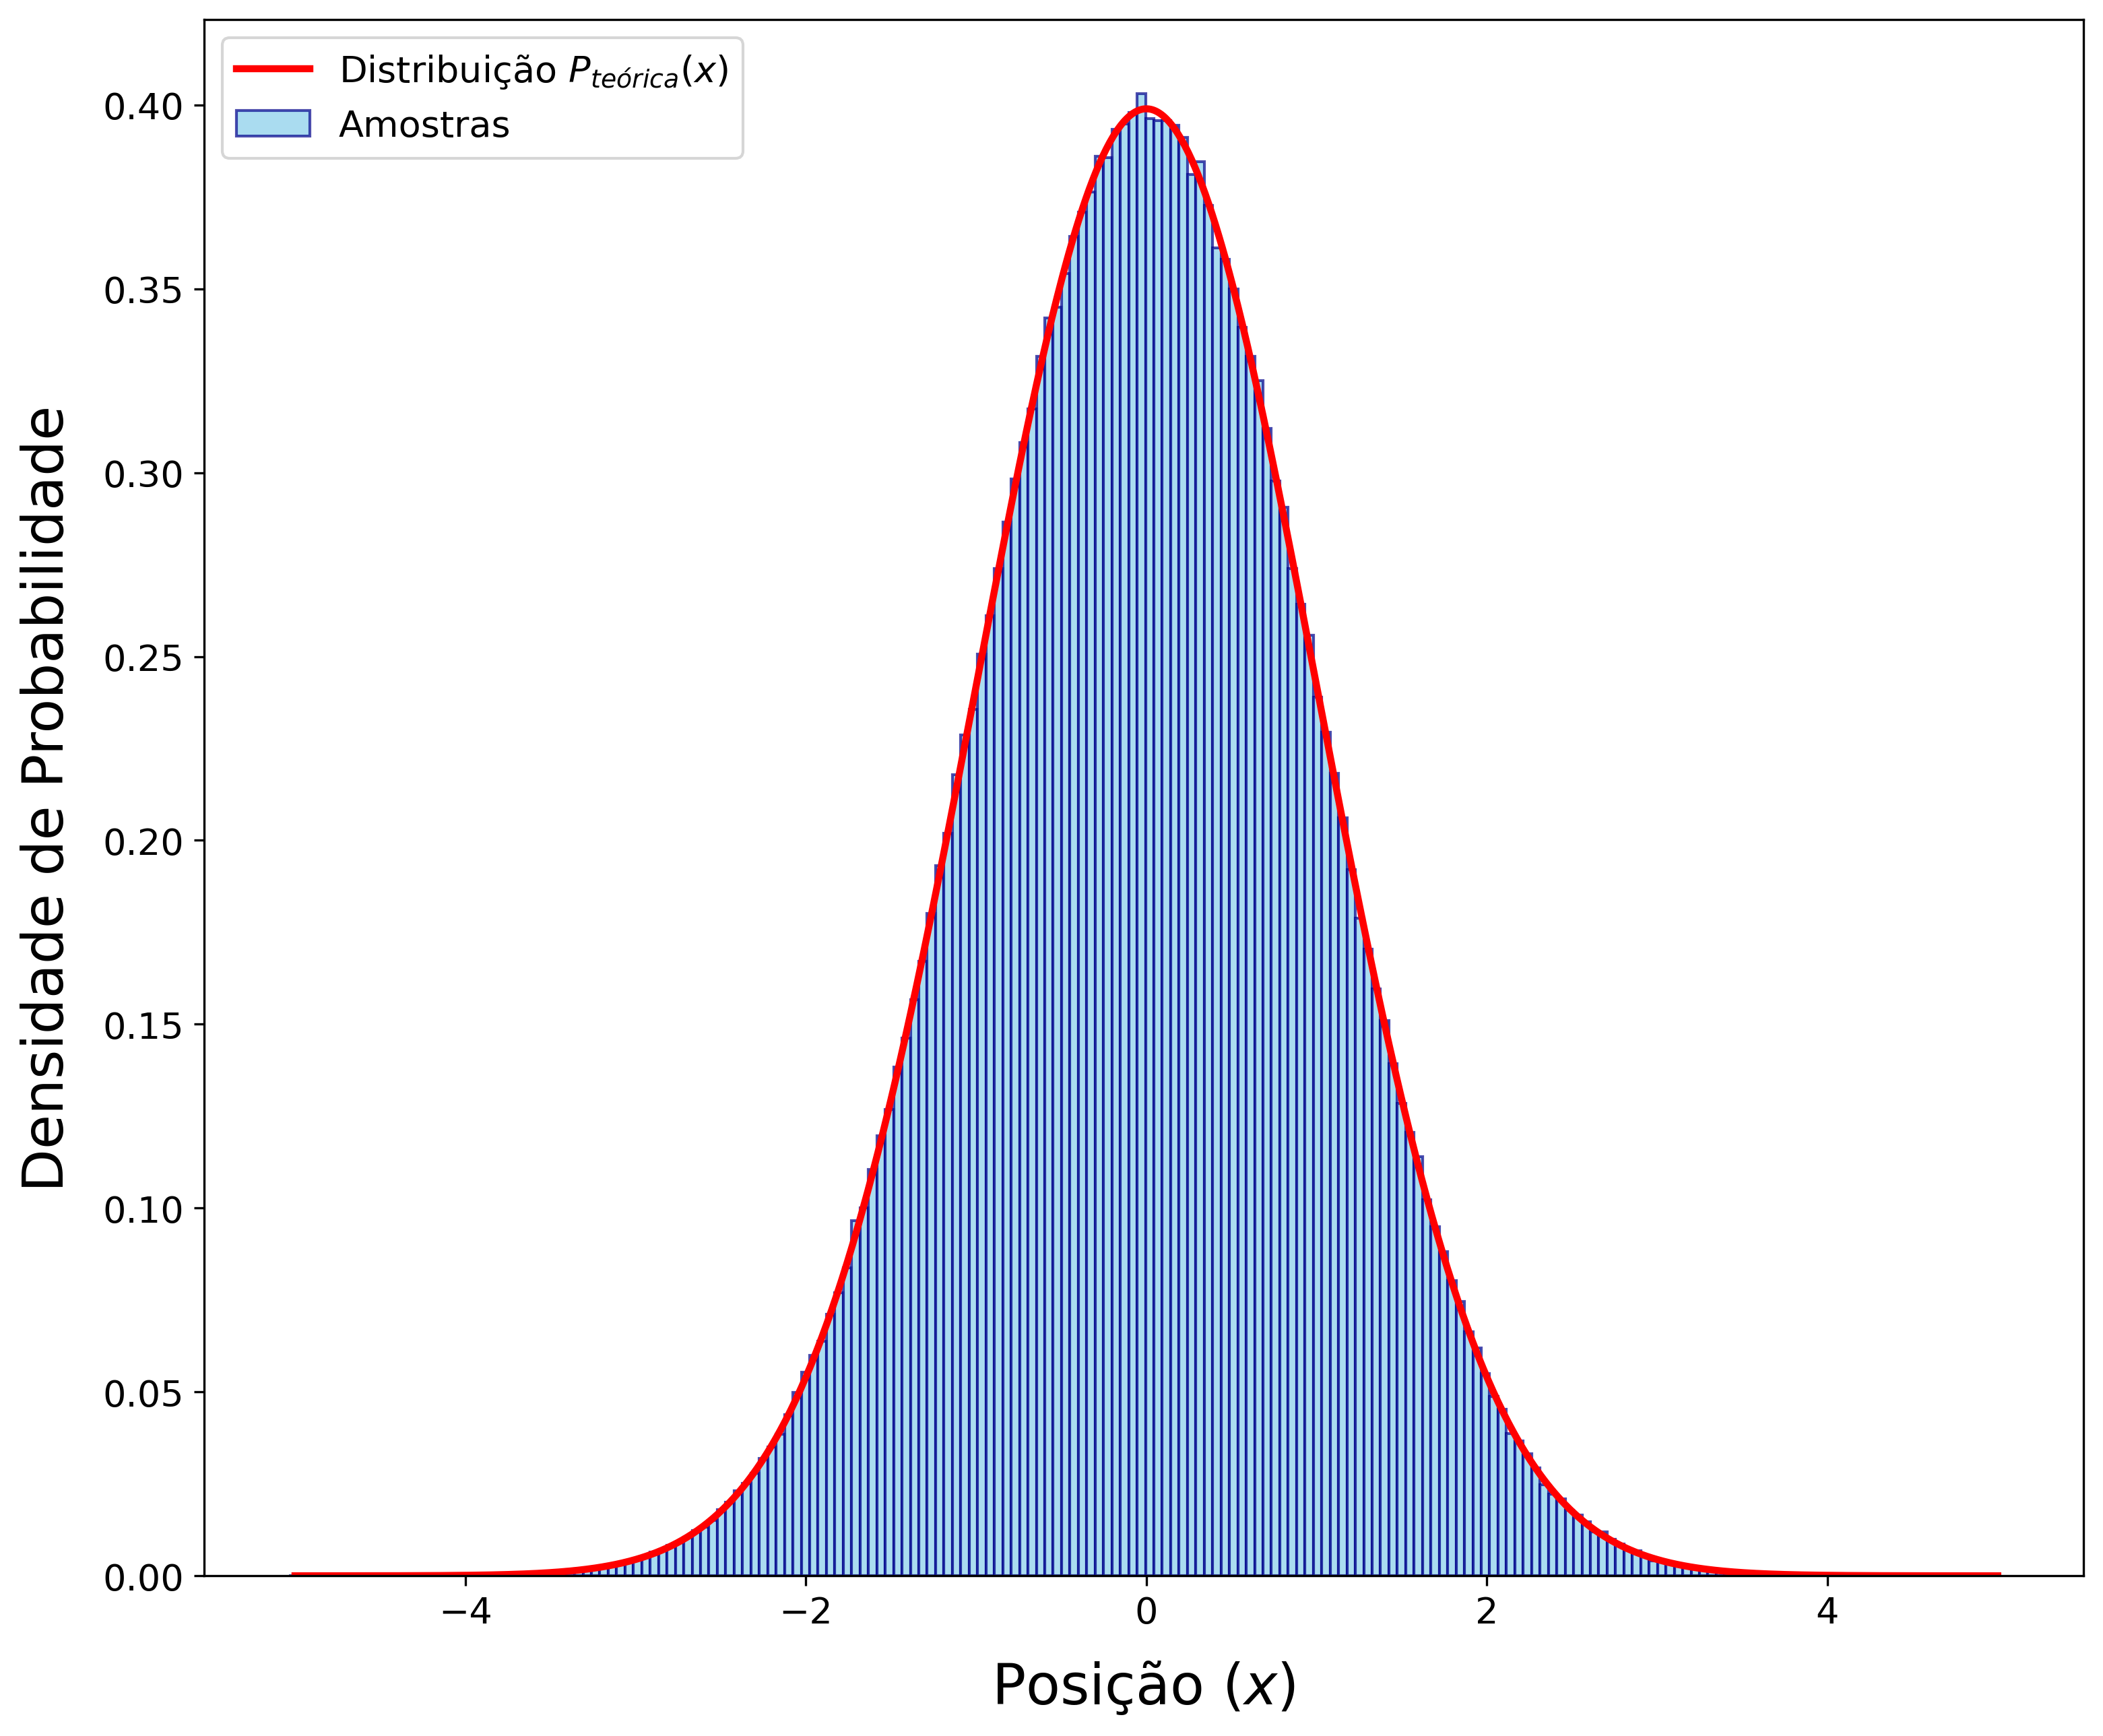

In [5]:
# Histograma
hist,limites = histograma_manual(samples, bins=200, densidade=True)

# Valores de x para a curva teórica
x = np.linspace(-5, 5, 1000)  
P_x = P_t(x)

# Calcula os centros dos bins
centros = (limites[:-1] + limites[1:]) / 2 

# Criando o gráfico
plt.figure(figsize=(12,10),dpi = 300)  

# Plotando o histograma
plt.bar(
    centros, hist, 
    width=limites[1] - limites[0], 
    alpha=0.7, 
    color='skyblue', 
    edgecolor='darkblue', 
    label="Amostras"
)

# Plotando a curva teórica
plt.plot(x, P_x, 'r-', linewidth=2.5, label="Distribuição $P_{teórica}(x)$")

# Personalizando textos e fontes
plt.xlabel("Posição ($x$)", fontsize=20, labelpad=10)
plt.ylabel("Densidade de Probabilidade", fontsize=20, labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13, loc='upper left')

# Salvar Figura
'''plt.savefig("Item a.png", dpi = 300)'''

# Exibir o gráfico
#plt.tight_layout()
plt.show()


 - d) Calculando a média e a variância da amostra obtida e comparando com os valores teóricos

In [11]:
# Médias
media = np.mean(samples)
media_t = 0

# Variâncias
variancia = np.var(samples)
variancia_t = 1/(beta*k)

# Erros
err_m = np.abs((media+1) - (media_t+1))*100/(media_t+1)
err_v = np.abs(variancia - variancia_t)*100/variancia_t

print(f"Média = {round(media,5)} || Média teórica = {media_t} || erro = {round(err_m,5)} %")
print(f"Variância = {round(variancia,5)} || Variância teórica = {variancia_t} ||| erro = {round(err_v,5)} %")


Média = -0.00051 || Média teórica = 0 || erro = 0.05107 %
Variância = 0.99977 || Variância teórica = 1.0 ||| erro = 0.02284 %


- e) Realizando os testes estatísticos de <span style="color:green;">Kolmogorov-Smirnov (K-S)</span>

In [ ]:
# Função CFD teórica
def CDF_t(x, beta, k):
    sigma = np.sqrt(1 / (beta * k))
    return 0.5 * (1 + erf(x / (sigma * np.sqrt(2))))

# Função para calcular o valor crítico D_crit
def valor_critico(alpha, n):
    """Calcula o valor crítico D_crit para o nível de significância alpha."""
    return sqrt(-0.5 * np.log(alpha / 2) / n)

# Função para calcular o p-valor
def p_valor(D, n):
    """Calcula o p-valor associado ao teste K-S."""
    K = sqrt(n) * D
    p = 2 * sum((-1)**(k-1) * np.exp(-2 * (k**2) * (K**2)) for k in range(1, 100))
    
    # Garante que o p-valor esteja no intervalo [0, 1]
    return min(max(p, 0), 1)  

# Teste K-S
def ks_test(samples, beta, k, alpha=0.05):

    n = len(samples)
    samples_sorted = np.sort(samples)
    
    # CDF empírica
    cdf_emp = np.arange(1, n+1) / n 
    
    # CDF teórica
    cdf_teor = np.array([CDF_t(x, beta, k) for x in samples_sorted])  

    # Estatística do teste
    D = np.max(np.abs(cdf_emp - cdf_teor))

    # Valor crítico
    D_crit = valor_critico(alpha, n)

    # p-valor
    p = p_valor(D, n)

    # Decisão do teste
    decisao = "Rejeitar H0" if D > D_crit else "Não rejeitar H0"

    return {
        "D": D,
        "D_crit": D_crit,
        "p_valor": p,
        "Decisão": decisao
    }


resultado = ks_test(samples, beta, k)
print("Resultado do Teste K-S:")
print(f"D = {resultado['D']}")
print(f"D_crítico = {resultado['D_crit']}")
print(f"p-valor = {resultado['p_valor']}")
print(f"Decisão: {resultado['Decisão']}")

Resultado do Teste K-S:
D = 0.0007060616324827129
D_crítico = 0.0013581015157406195
p-valor = 0.7011220466103938
Decisão: Não rejeitar H0


## Problema 2

In [37]:
np.random.seed(42)
D = 1e-7
max_steps = 1e5
n_steps = int(1e4)
x0 = 0
dt = 1e-3
gamma = 1
x = []
beta = 10
# Função do Potencial 
def V(x):
    return x**4 - 4*x**2

# Função da derivada do Potencial
def dV_dx(x):
    return 4*x**3 - 8*x

# Definição do Ruído
def noise(t):
    return np.random.normal(loc=0, scale=1/(2*D), size=np.shape(t))

# Solucionador da equação diferencial
def langevin_solver():
    
    x = x0
    steps = 0
    trajetoria = []
    tolerancia = 1e-8
    
    # Condição de parada no equilibrio, quando a diferença entre os passos se torna muito pequena
    while steps < max_steps:
        
            # Calcular ruído gaussiano
            noise = np.random.normal(0, np.sqrt((2*D)/dt))

            # Atualizar posição usando Euler-Maruyama
            x_new = x - (1 / gamma) * dV_dx(x) * dt + noise
            trajetoria.append(x_new)
            steps += 1

            # Verificar critério de convergência
            if np.abs(x_new - x) < tolerancia:
                break

            # Atualizar x para o próximo passo
            x = x_new

    return np.array(trajetoria), steps

def metropolis(n_steps, delta_x, x0, beta):
    x = x0
    trajectory = []
    for _ in range(n_steps):
        # Propor uma nova posição
        delta = np.random.uniform(-delta_x, delta_x)  # Passo aleatório
        x_new = x + delta

        # Calcular a variação de energia
        delta_V = V(x_new) - V(x)

        # Probabilidade de aceitação
        acceptance_probability = min(1, np.exp(-beta * delta_V))

        # Aceitar ou rejeitar a nova posição
        if np.random.random() < acceptance_probability:
            x = x_new

        # Armazenar a posição
        trajectory.append(x)

    return np.array(trajectory)
# Função do histograma, será utilizado nas demais questões
def histograma_manual(dados, bins, densidade=False):
    
    # Determinar os limites do histograma
    minimo = np.min(dados)
    maximo = np.max(dados)
    limites = np.linspace(minimo, maximo, bins + 1)  # Criar os limites dos bins
    
    # Inicializar o array de contagem
    hist = np.zeros(bins)
    
    # Contar os dados em cada bin
    for valor in dados:
        # Identificar o índice do bin correspondente
        idx = np.searchsorted(limites, valor, side='right') - 1
        if idx >= 0 and idx < bins:
            hist[idx] += 1
    
    if densidade:
        # Calcular a densidade de probabilidade
        largura_bin = limites[1] - limites[0]
        hist = hist / (np.sum(hist) * largura_bin)
    
    return hist, limites

- a) Mostrando que no <span style="color:blue;">equilibrio</span>, a distribuição de probabilidade estacionária da posição, $x$, é a distribição de <span style="color:red;">Boltzman</span>

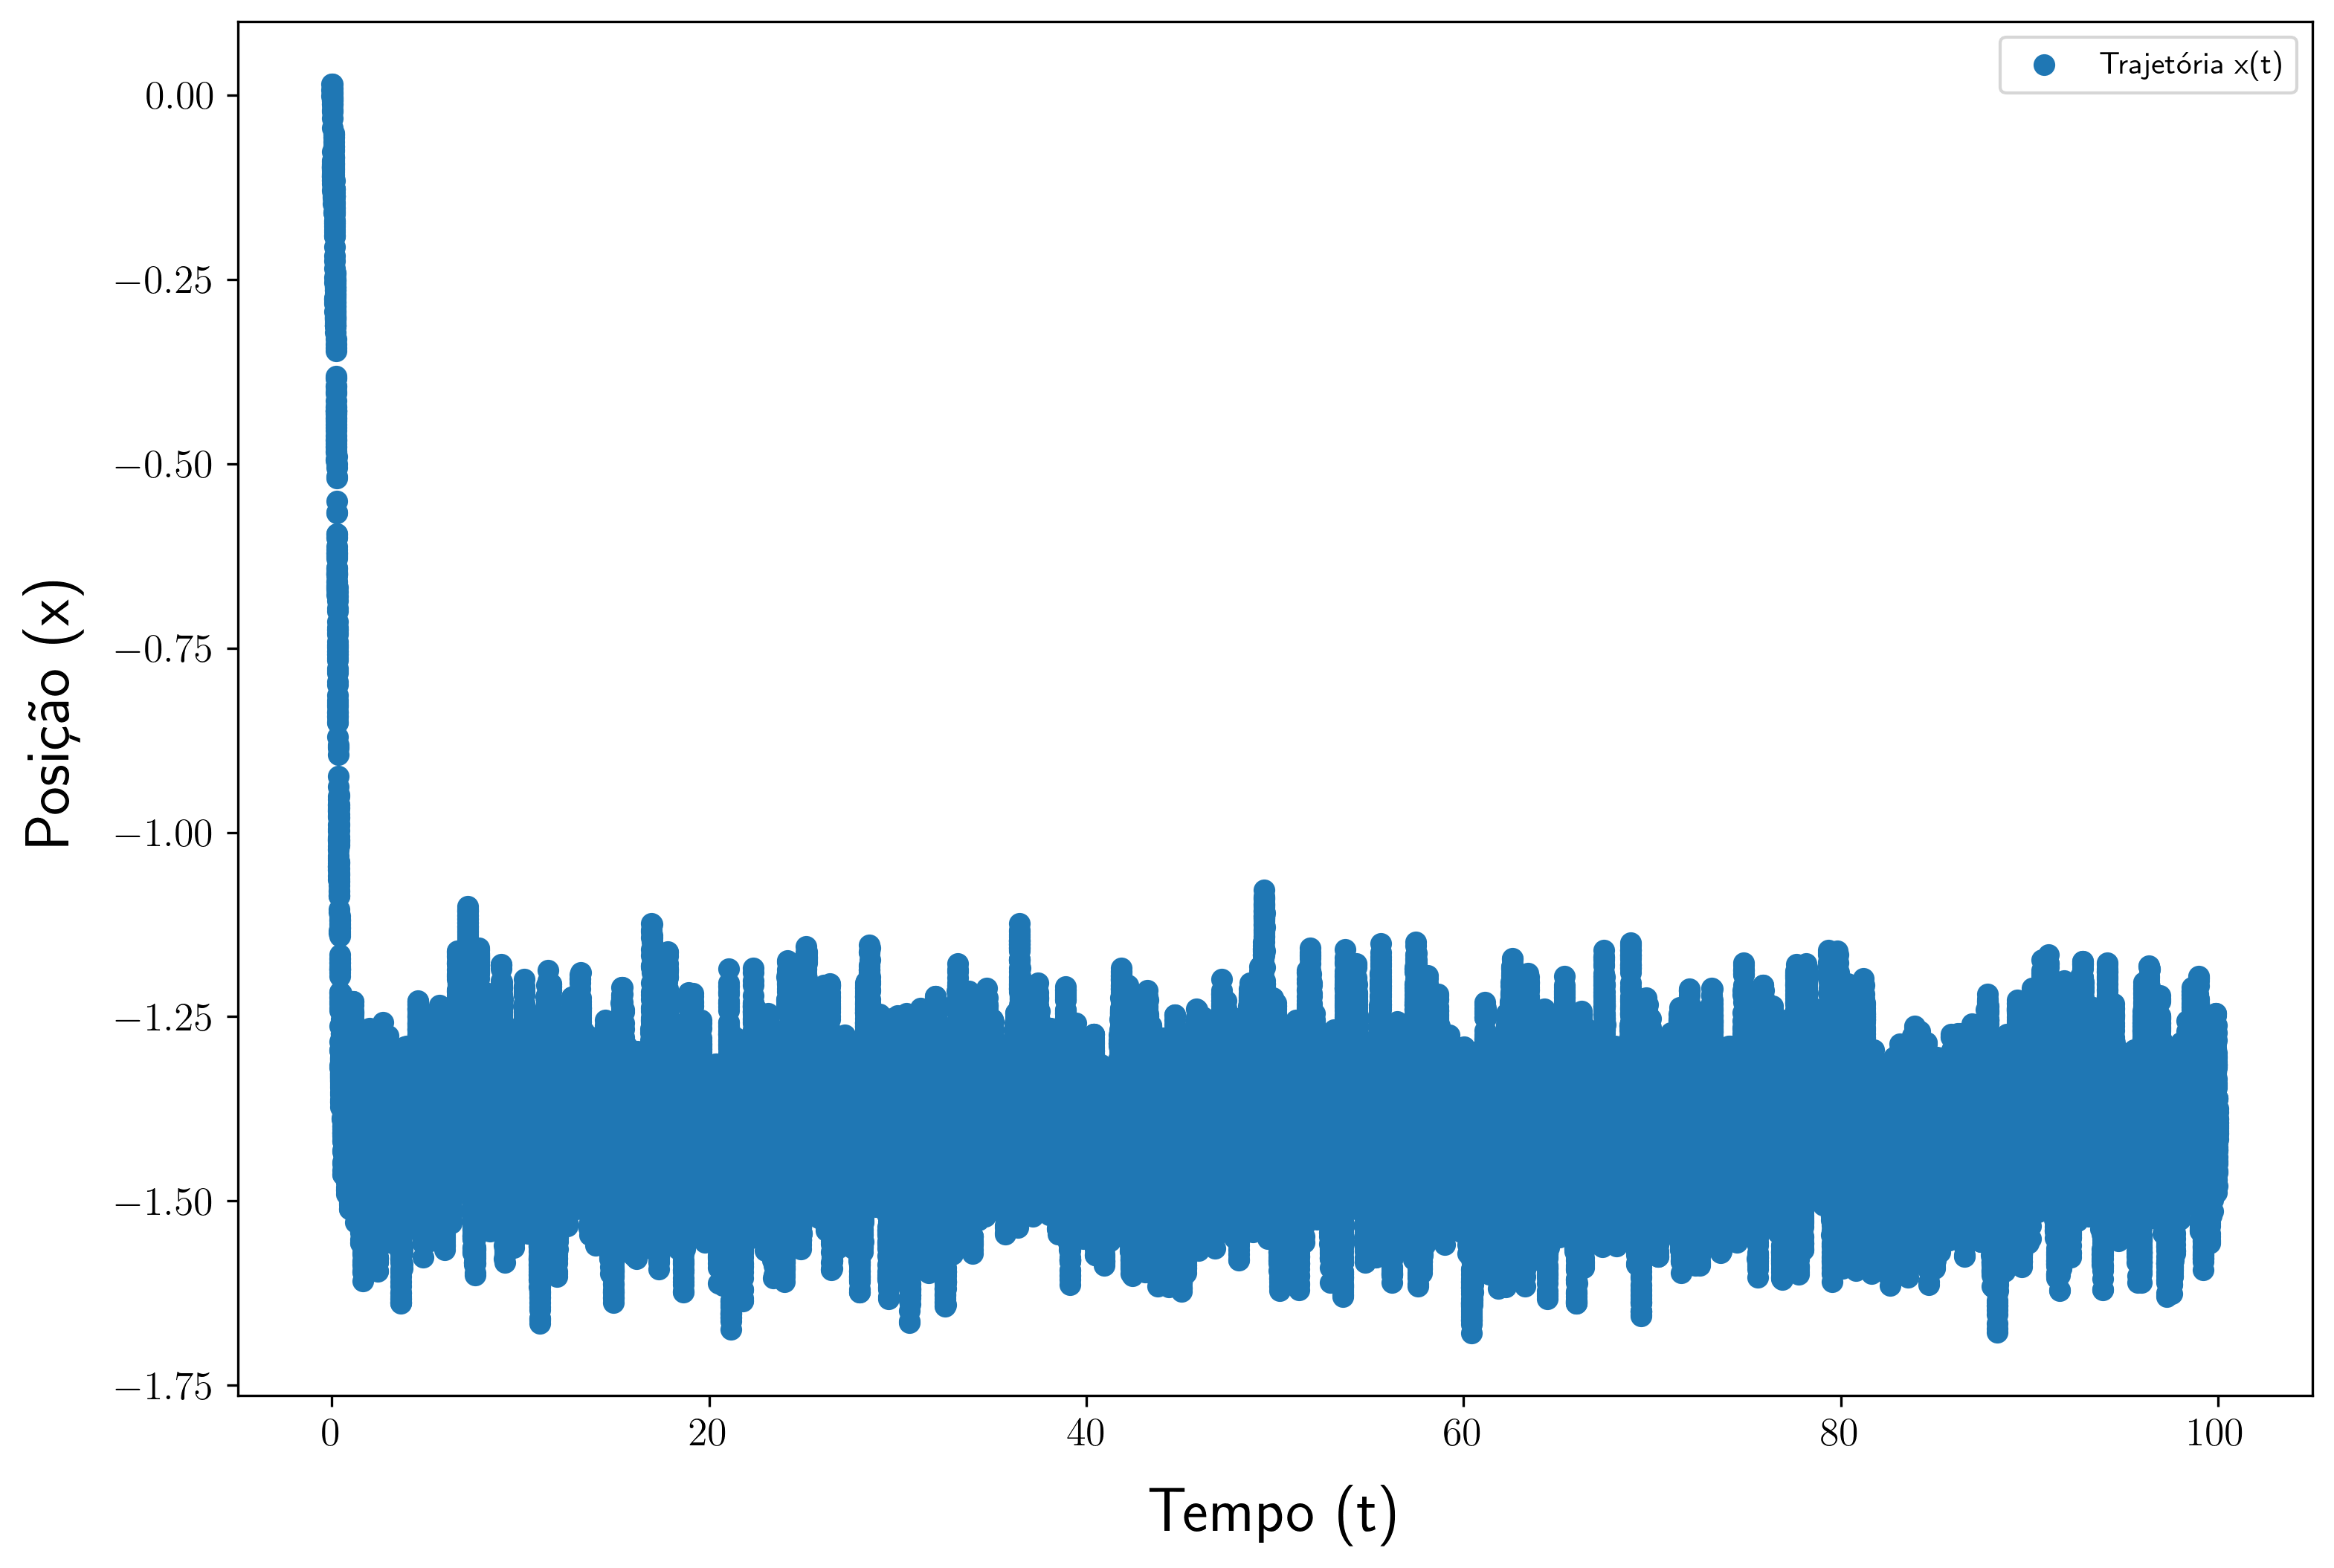

In [ ]:
# Trajetórias da partícula
x_trajetoria, steps = langevin_solver()

# Tempo correspondente
T = dt*steps
time = np.linspace(0, T, steps)

# Criando o gráfico
plt.figure(figsize=(12, 8), dpi = 300) 

# Plotando a posição em Função do Tempo
plt.scatter(time, x_trajetoria, label="Trajetória x(t)")
plt.xlabel("Tempo (t)",fontsize=20, labelpad=10)
plt.ylabel("Posição (x)",fontsize=20, labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.legend(loc="best")
plt.show()


In [40]:
# Executar várias simulações
np.random.seed(42)
num_simulations = 100
trajetorias = [langevin_solver()[0] for _ in range(num_simulations)]

x_vals = np.concatenate(trajetorias)

# Comparar com a distribuição teórica
x_range = np.linspace(-3, 3, 1000)
P_teorica = np.exp(-beta * V(x_range))

# Normalizando
P_teorica /= np.trapz(P_teorica, x_range)  



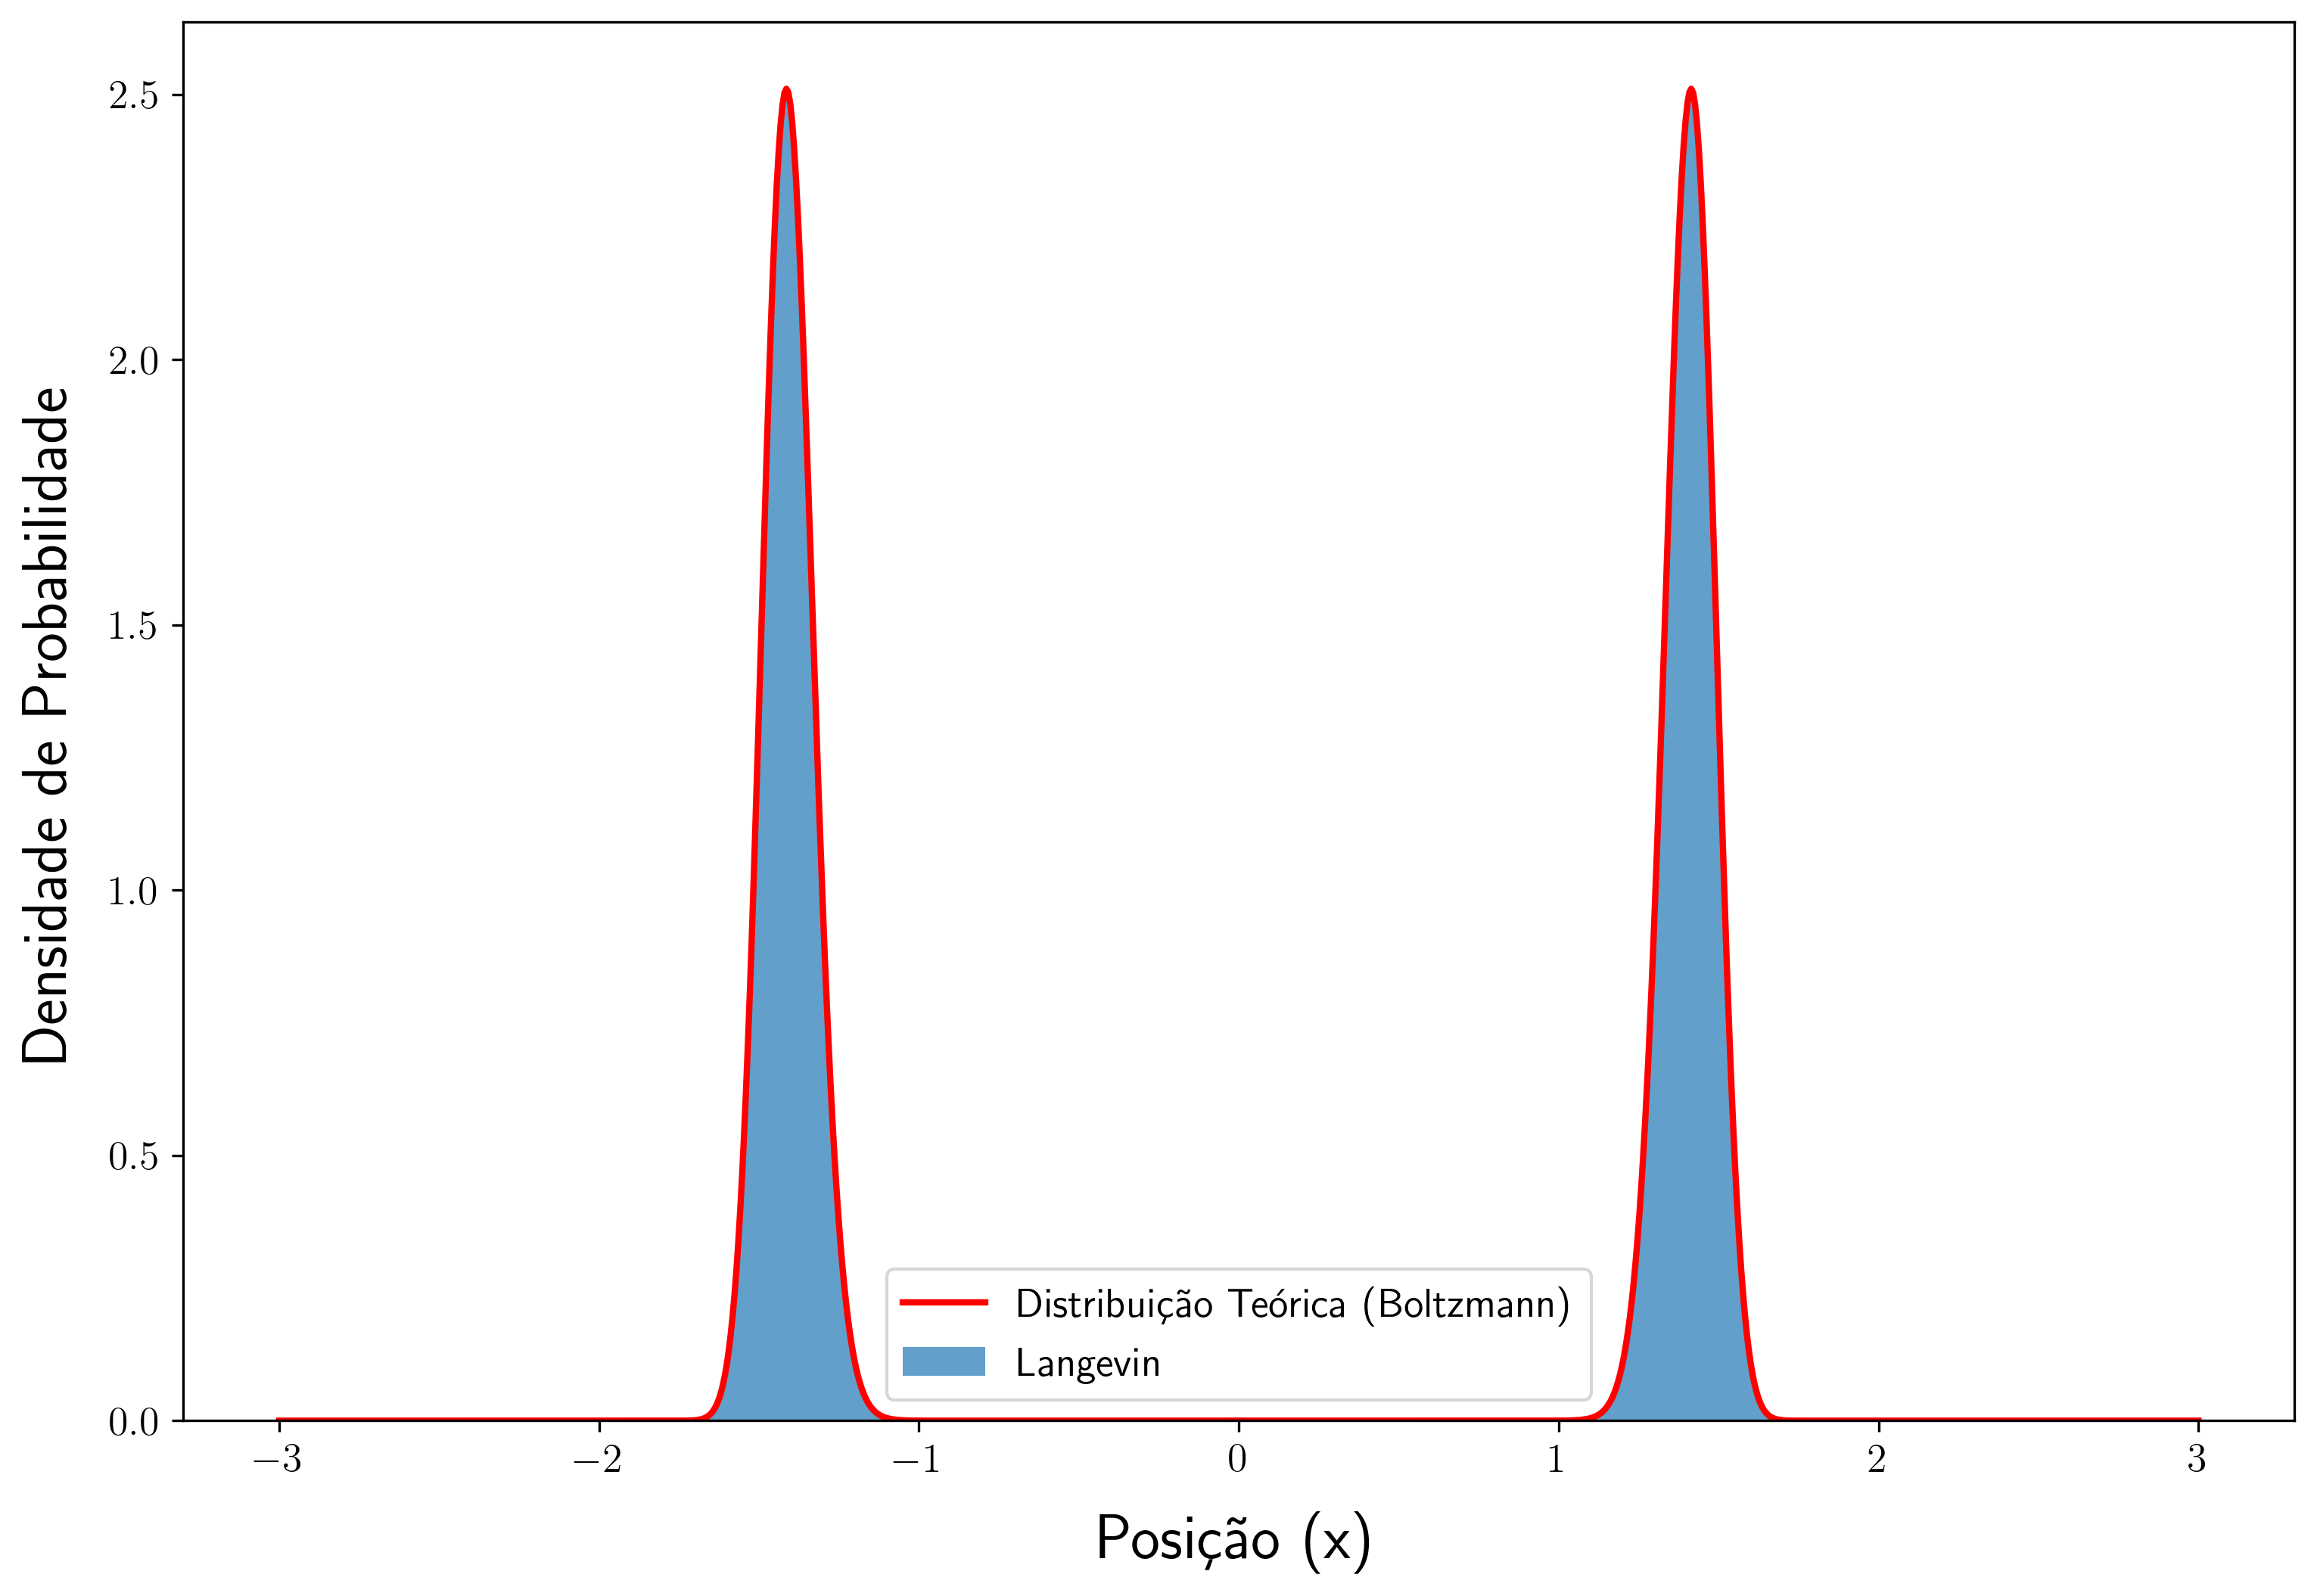

In [ ]:
# Histograma
hist_l,limites_l = histograma_manual(x_vals, bins=500, densidade=True)
centros_l = (limites_l[:-1] + limites_l[1:]) / 2 

# Criando o gráfico
plt.figure(figsize=(12, 8), dpi = 300) 
plt.bar(
    centros_l, hist_l, 
    width=limites_l[1] - limites_l[0], 
    alpha=0.7,  
    label="Langevin"
)
plt.plot(x_range, P_teorica, 'r-', linewidth=2, label="Distribuição Teórica (Boltzmann)")
plt.xlabel("Posição (x)",fontsize=20, labelpad=10)
plt.ylabel("Densidade de Probabilidade",fontsize=20, labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc="best",fontsize = 13)
# Salvar a figura 
# plt.savefig("Q2_a.png", dpi = 300)
plt.show()

- b) Usando o algoritimo de Metropolis paara simular o comportamento estatístico da partícula no potencial

In [44]:
# Passo do metropolis
dx = 0.7

# Número de passos
n_steps = int(1e6)

# Sorteando o ponto inicial
sort_x0 = np.random.uniform(-2,2)

# Valor de beta
beta = 0.8

# Simulação de metropolis
trajetoria_metropolis = metropolis(n_steps,dx, sort_x0, beta)
tempo_metropolis = np.linspace(0, n_steps * dt,n_steps)


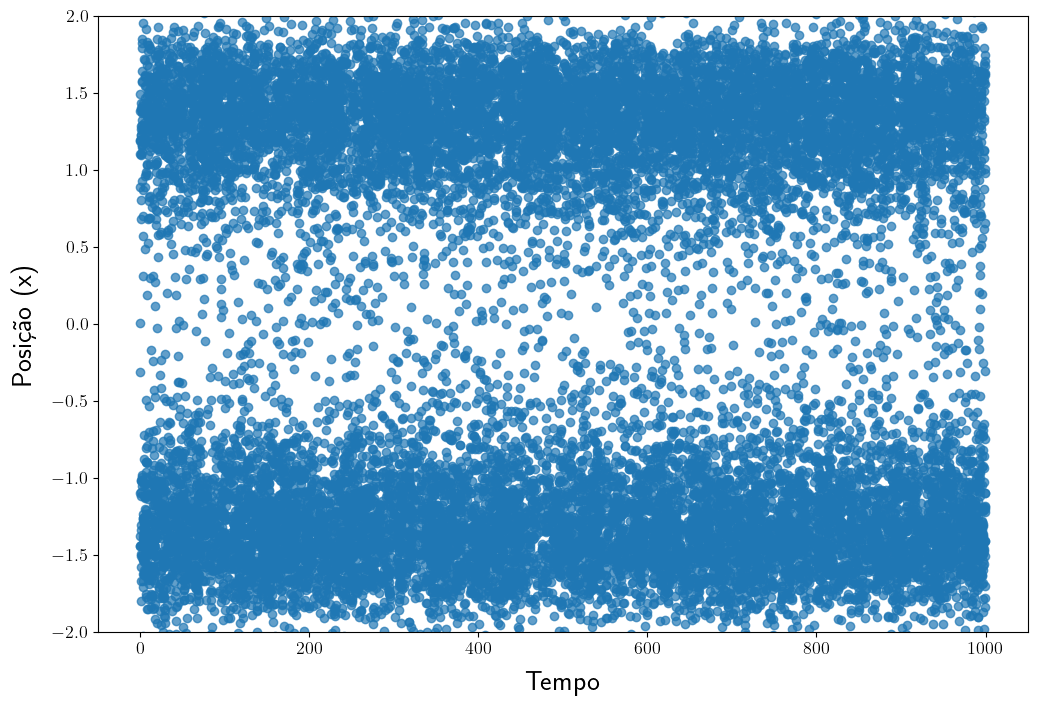

In [ ]:
step = 50  # Intervalo de subamostragem
plt.figure(figsize=(12, 8)) 
plt.scatter(tempo_metropolis[::step], trajetoria_metropolis[::step], alpha=0.7)
plt.ylim(-2, 2)
plt.xlabel("Tempo", fontsize=20, labelpad=10)
plt.ylabel("Posição (x)", fontsize=20, labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# Salvando a figura
'''plt.savefig("Q2_b.png",dpi = 300)'''
plt.show()


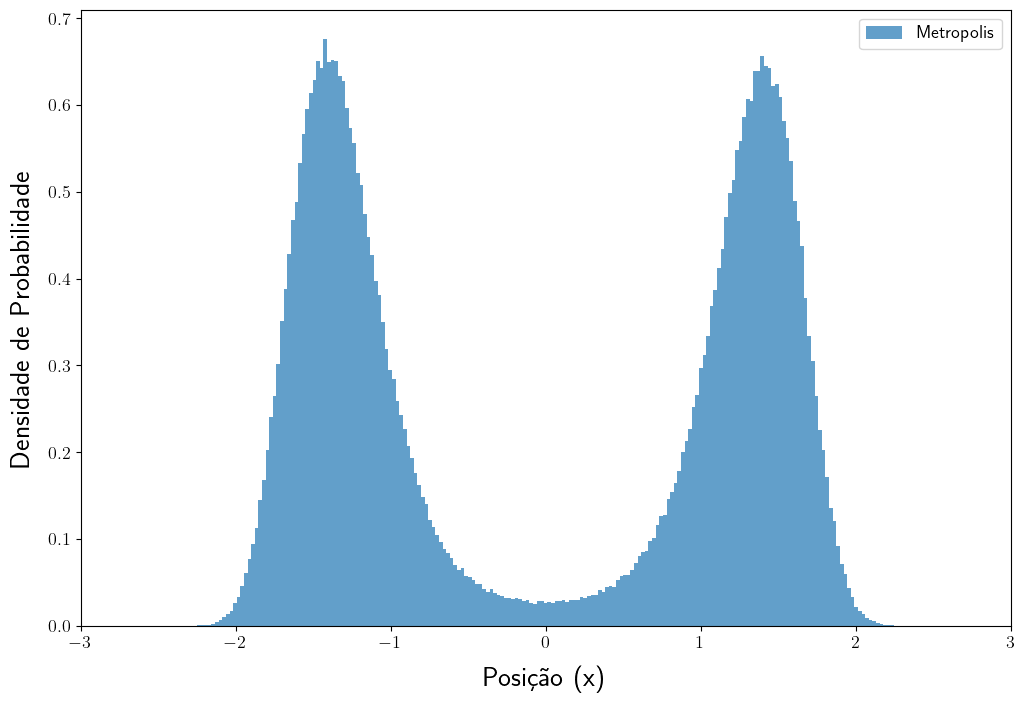

In [47]:
# Histograma
hist,limites = histograma_manual(trajetoria_metropolis, bins=200, densidade=True)
centros = (limites[:-1] + limites[1:]) / 2 
plt.figure(figsize=(12, 8)) 
plt.bar(
    centros, hist, 
    width=limites[1] - limites[0], 
    alpha=0.7,  
    label="Metropolis"
)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(-3,3)
plt.xlabel("Posição (x)",fontsize=20, labelpad=10)
plt.ylabel("Densidade de Probabilidade",fontsize=20, labelpad=10)
plt.legend(loc = 'best', fontsize = 13)
# Salvando a Figura
#plt.savefig("Q2_b2.png",dpi=300)
plt.show()

- c) Agora vamos compara a simulação obtida pelo algoritimo de Metropolis com a dinâmica da equação de Langevin, para o caso estacionário

In [48]:
# Passo do metropolis
dx = 3

# Número de passos
n_steps = int(1e6)

# Sorteando o ponto inicial
sort_x0 = np.random.uniform(-2,2)

# Valor de beta
beta = 10

# Simulação de metropolis
trajetoria_metropolis = metropolis(n_steps,dx, sort_x0, beta)
tempo_metropolis = np.linspace(0, n_steps * dt,n_steps)


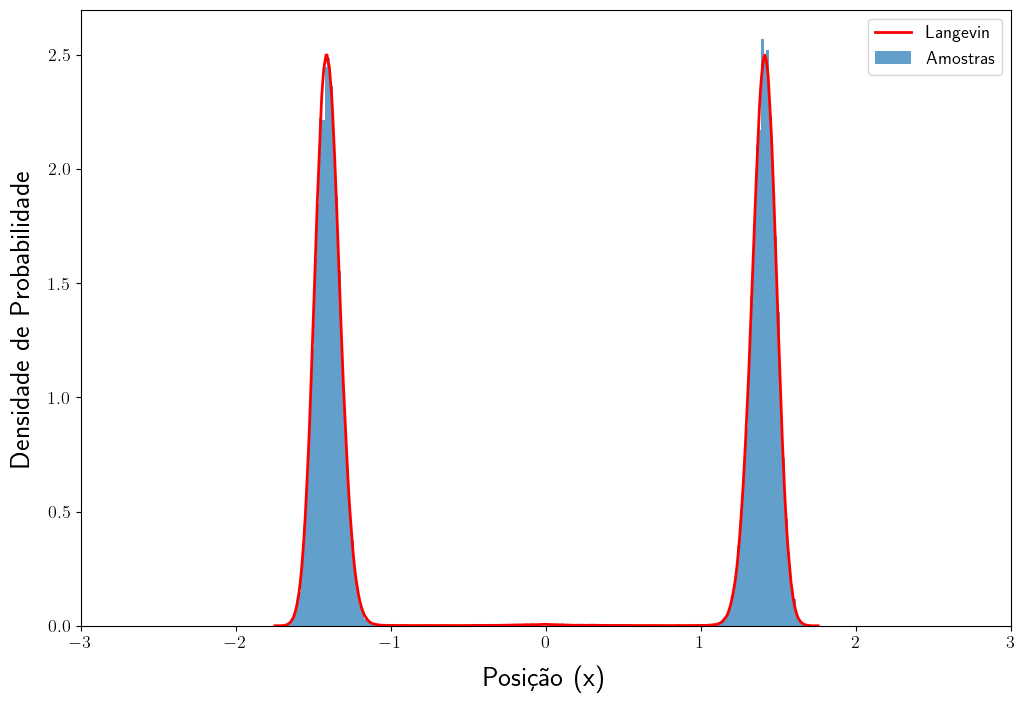

In [49]:
# Histograma
hist,limites = histograma_manual(trajetoria_metropolis, bins=200, densidade=True)
centros = (limites[:-1] + limites[1:]) / 2 
plt.figure(figsize=(12, 8)) 
plt.bar(
    centros, hist, 
    width=limites[1] - limites[0], 
    alpha=0.7,  
    label="Amostras"
)
plt.plot(
    centros_l, hist_l, 
    linestyle='-',  # Estilo de linha contínua
    linewidth=2,    # Espessura da linha
    label="Langevin",  # Legenda
    color = 'red'
)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(-3,3)
plt.xlabel("Posição (x)",fontsize=20, labelpad=10)
plt.ylabel("Densidade de Probabilidade",fontsize=20, labelpad=10)
plt.legend(loc ='best', fontsize = 13)
# Salvando a Figura
'''plt.savefig("Q2_c.png", dpi = 300)'''
plt.show()

- d) Realizando simulações de monte carlo variando o $\beta$, podemos calcular a probabilidade de encontrar a partícula proxima de algum dos mínimos (Somam de probabilidade de encontrar em $\sqrt{2}$ e $-\sqrt{2}$ )

In [50]:
import numpy as np
import os

# Parâmetros gerais
dx = 3  # Passo do Metropolis
n_steps = int(1e6)  # Número de passos
results = []  # Para armazenar os resultados

# Lista de valores de beta
betas = np.linspace(0.01, 20, 200)  # Valores de beta para simular

if os.path.exists("metropolis_simulation_results.csv"):
    print("Já existe um arquivo de resultado")

else:
    for beta in betas:
        sort_x0 = np.random.uniform(-2, 2)  # Sorteando o ponto inicial
        trajetoria_metropolis = metropolis(n_steps, dx, sort_x0, beta)

        # Criar histograma normalizado
        hist, bin_edges = np.histogram(trajetoria_metropolis, bins=100, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Probabilidade próxima dos mínimos
        prob_minimo_1 = np.sum(hist[np.abs(bin_centers - (-np.sqrt(2))) < 0.1]) * (bin_edges[1] - bin_edges[0])
        prob_minimo_2 = np.sum(hist[np.abs(bin_centers - np.sqrt(2)) < 0.1]) * (bin_edges[1] - bin_edges[0])

        # Armazenar os resultados
        results.append([beta, prob_minimo_1, prob_minimo_2, prob_minimo_1 + prob_minimo_2])

    # Converter a lista de resultados para um array NumPy
    results_array = np.array(results)

    # Salvar o array em um arquivo CSV
    np.savetxt(
        "metropolis_simulation_results.csv",
        results_array,
        delimiter=",",
        header="beta,prob_minimo_1,prob_minimo_2,prob_total",
        comments="",
        fmt="%.8f"
    )

    # Mostrar os resultados
    print(results_array)


Já existe um arquivo de resultado


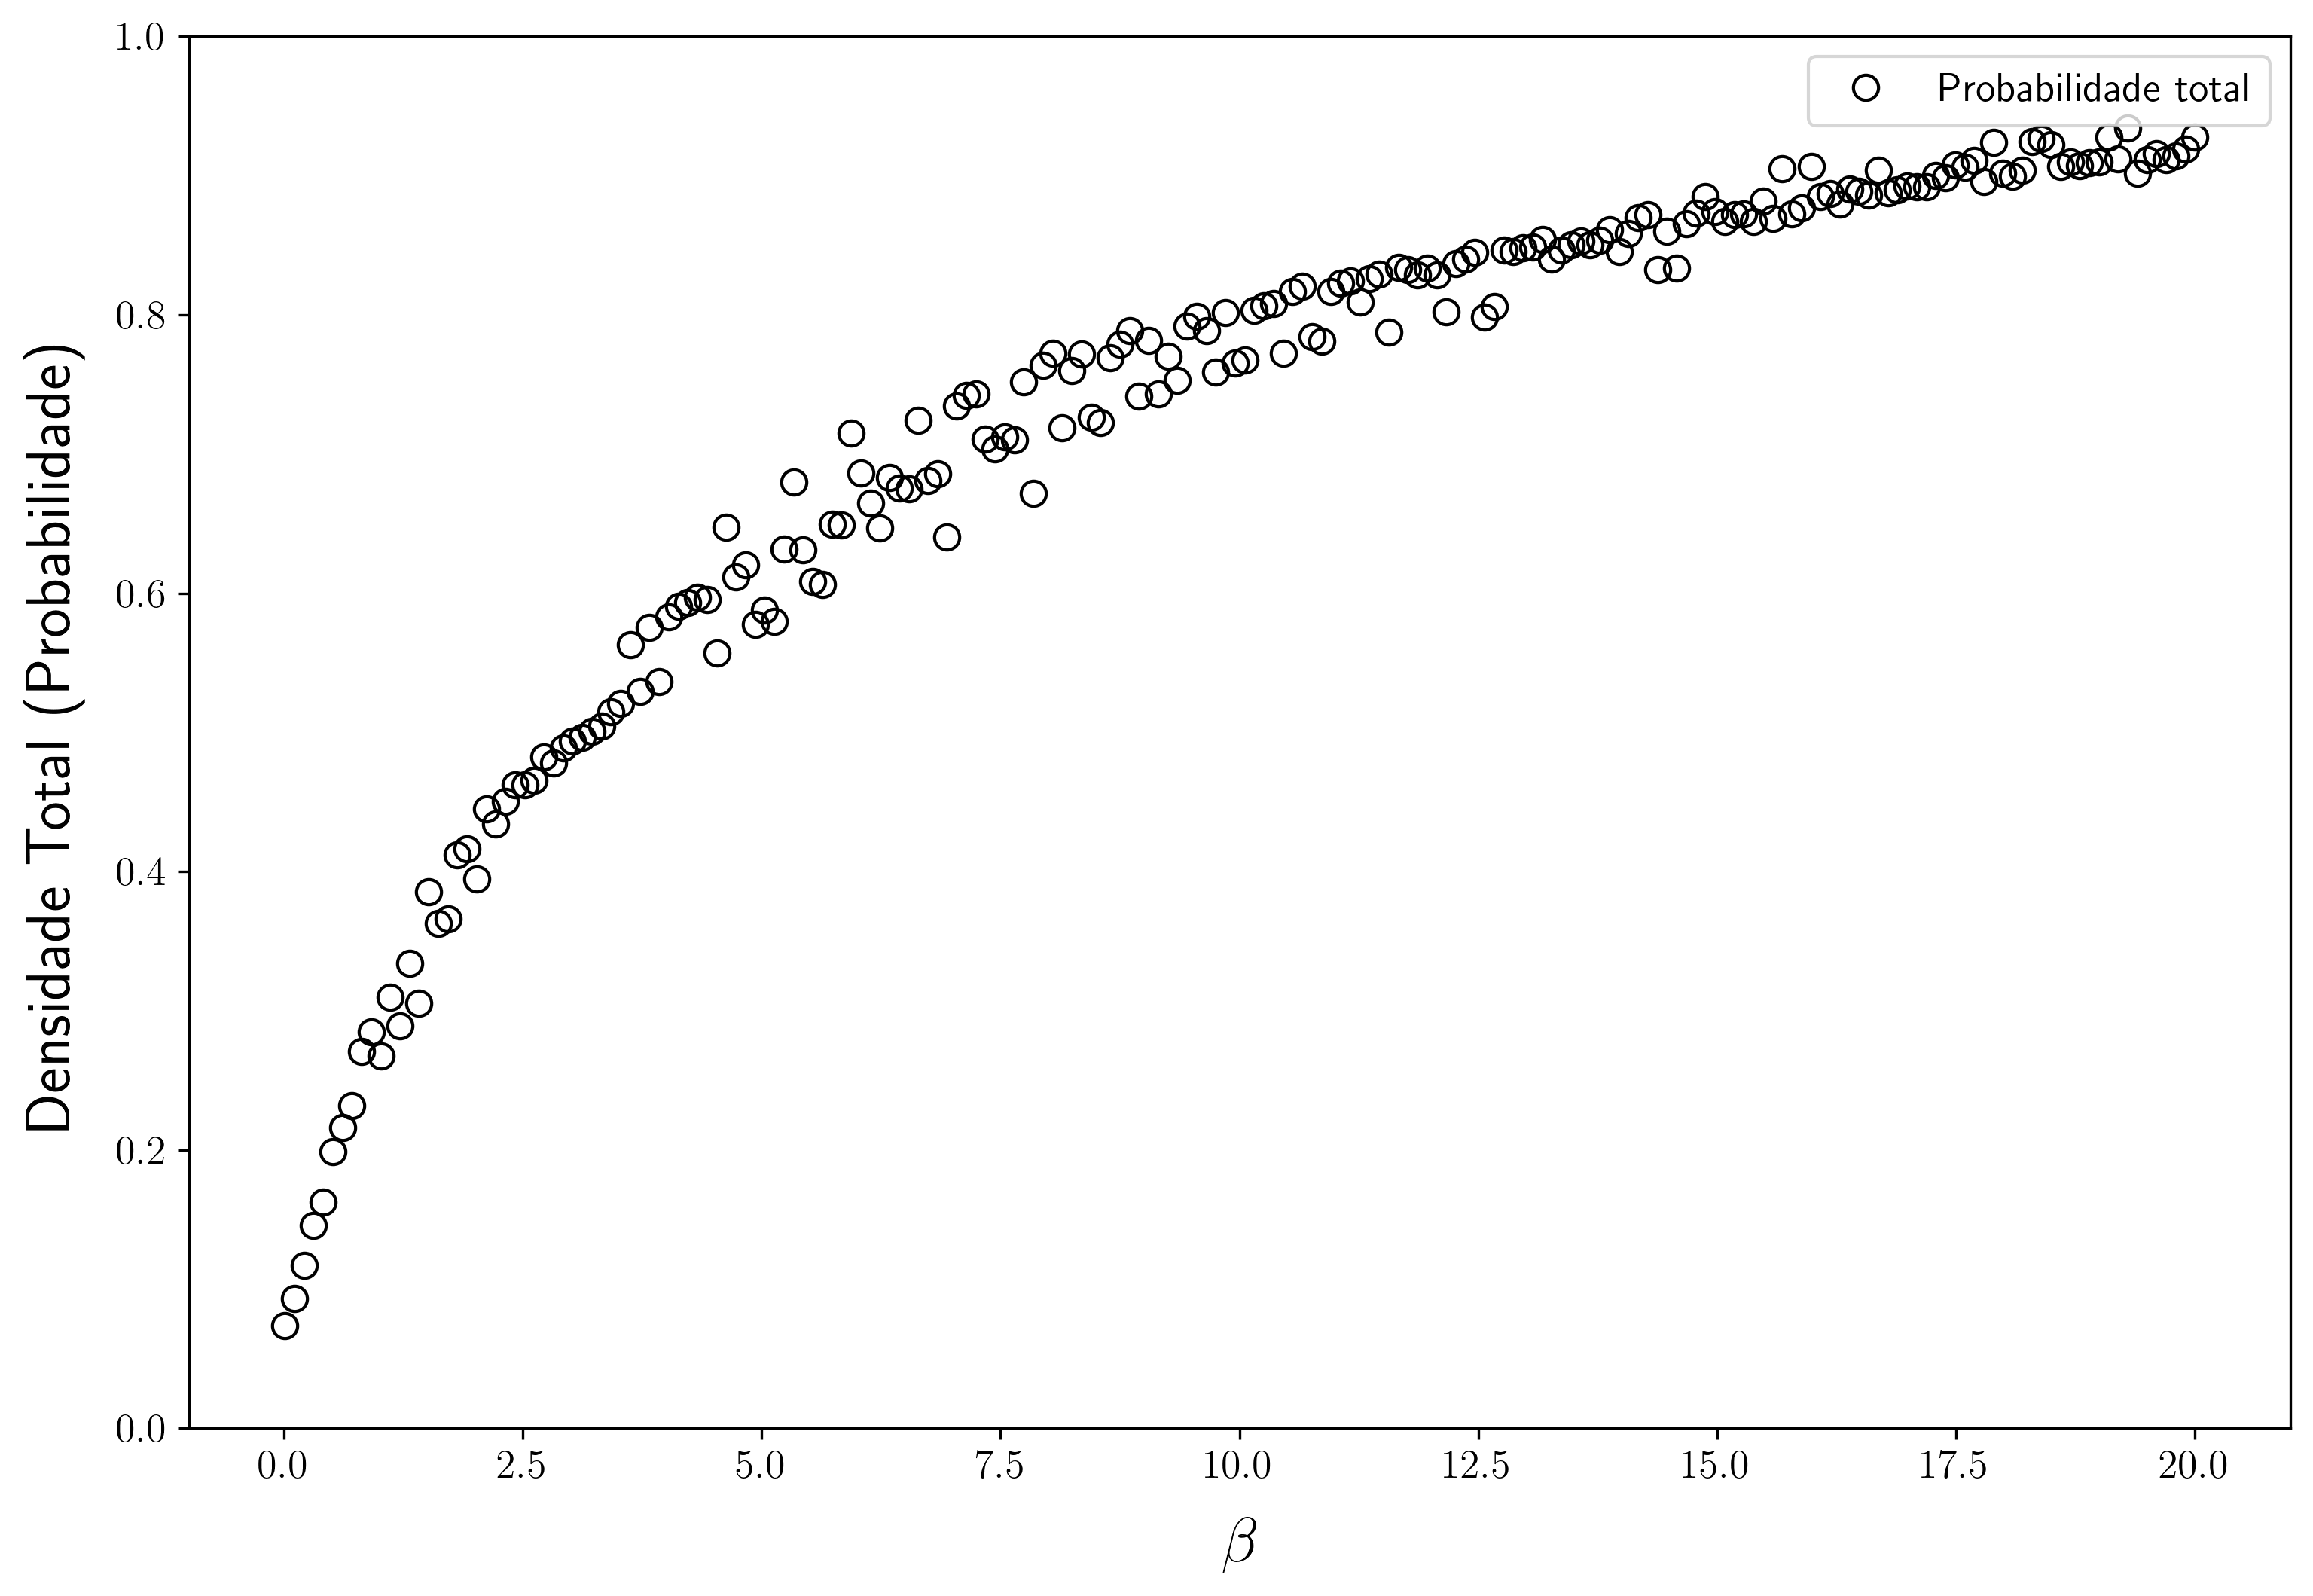

In [ ]:
# Ler o arquivo CSV usando numpy
data = np.loadtxt("metropolis_simulation_results.csv", delimiter=",", skiprows=1)

# Separar as colunas (beta, prob_minimo_1, prob_minimo_2, prob_total)
beta = data[:, 0]  # Primeira coluna: beta
prob_total = data[:, 3]  # Quarta coluna: prob_total

# Plotar o gráfico
plt.figure(figsize=(12, 8), dpi = 300)
plt.plot(beta, prob_total, marker='o', linestyle='', markerfacecolor='none', color='black', label="Probabilidade total", markersize=8)
plt.xlabel(r"$\beta$", fontsize=20, labelpad=10)
plt.ylabel("Densidade Total (Probabilidade)", fontsize=20, labelpad=10)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='best', fontsize=13)
plt.ylim(0, 1)

# Salvando a Figura
'''plt.savefig("Q2_d.png", dpi=300)'''

# Mostrar o gráfico
plt.show()



## Problema 3

A constante de Stefan-Boltzmann, $\sigma$, relaciona a energia total emitida por um corpo negro com sua temperatura. Ela é dada por:

$\sigma = \frac{\pi^2 k_B^4}{60 \hbar^3 c^2} \cdot \zeta(4),$

onde $\zeta(s)$ é a função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma integral:

$\zeta(s) = \frac{1}{\Gamma(s)} \int_{0}^{\infty} x^{s-1} e^{-x} \frac{1}{1 - e^{-x}} \, dx,$

onde $\Gamma(s) = (s-1)!$ é a função Gamma. Utilizando **importance sampling**, gere amostras aleatórias de $x$ de uma distribuição exponencial, $\omega(x) = e^{-x}$ para $x \geq 0$, que corresponde ao termo $e^{-x}$ no integrando. Reescreva a integral como:

$\zeta(s) = \frac{1}{\Gamma(s)} \mathbb{E}\left[ \frac{x^{s-1}}{1 - e^{-x}} \right].$

Compare seu resultado de Monte Carlo com o valor exato:

$\zeta(4) = \frac{\pi^4}{90}.$


In [ ]:
a = 0
s = 4
#N = 10000000
for i in range(N):
    x = math.log(1 - random.random())
    a += pow(x, s-1)/(1 -  pow(math.e, -x))*pow(math.e, -x)
a /= N
a *= 1/math.factorial(s-1)
b = pow(math.pi, s)/90
erro = abs((a - b) * 100 / b)

print(f'Monte Carlo:',round(a,5))
print(f'Teorico:',round(b,5))
print(f'Erro:',round(erro,4))

Monte Carlo: 1.08442
Teorico: 1.08232
Erro: 0.1938


## Problema 4

Considere a integral de uma função $f(x)$ em um espaço de $d$ dimensões. A integral pode ser expressa como:

$I = \int_{[0,1]^d} f(x) \, dx.$

1. **(a)** Utilize o método de Monte Carlo para estimar a integral acima. Gere $N$ vetores $\mathbf{x}$ com componentes uniformemente distribuídas no intervalo $[0,1]$ para $d = 1$ e $f(x) = e^{-|\mathbf{x}|^2}$.

2. **(b)** Para diferentes valores de $d$ ($d = 2, 6, 10$), estude como o número de amostras $N$ necessário para alcançar uma precisão desejada varia com a dimensionalidade.

3. **(c)** Calcule o erro padrão da média para cada caso e analise a taxa de convergência.


- a) Utilize o método de Monte Carlo para estimar a integral acima. Gere $N$ vetores $\mathbf{x}$ com componentes uniformemente distribuídas no intervalo $[0,1]$ para $d = 1$ e $f(x) = e^{-|\mathbf{x}|^2}$.

- b) Para diferentes valores de $d$ ($d = 2, 6, 10$), estude como o número de amostras $N$ necessário para alcançar uma precisão desejada varia com a dimensionalidade.

- c) Calcule o erro padrão da média para cada caso e analise a taxa de convergência.


In [14]:
#### Para d = 6
d = 6
n = np.arange(1000, 200_000, 1000)
error6 = [Q4(int(i),d) for i in n]
error6 = np.array(error6)

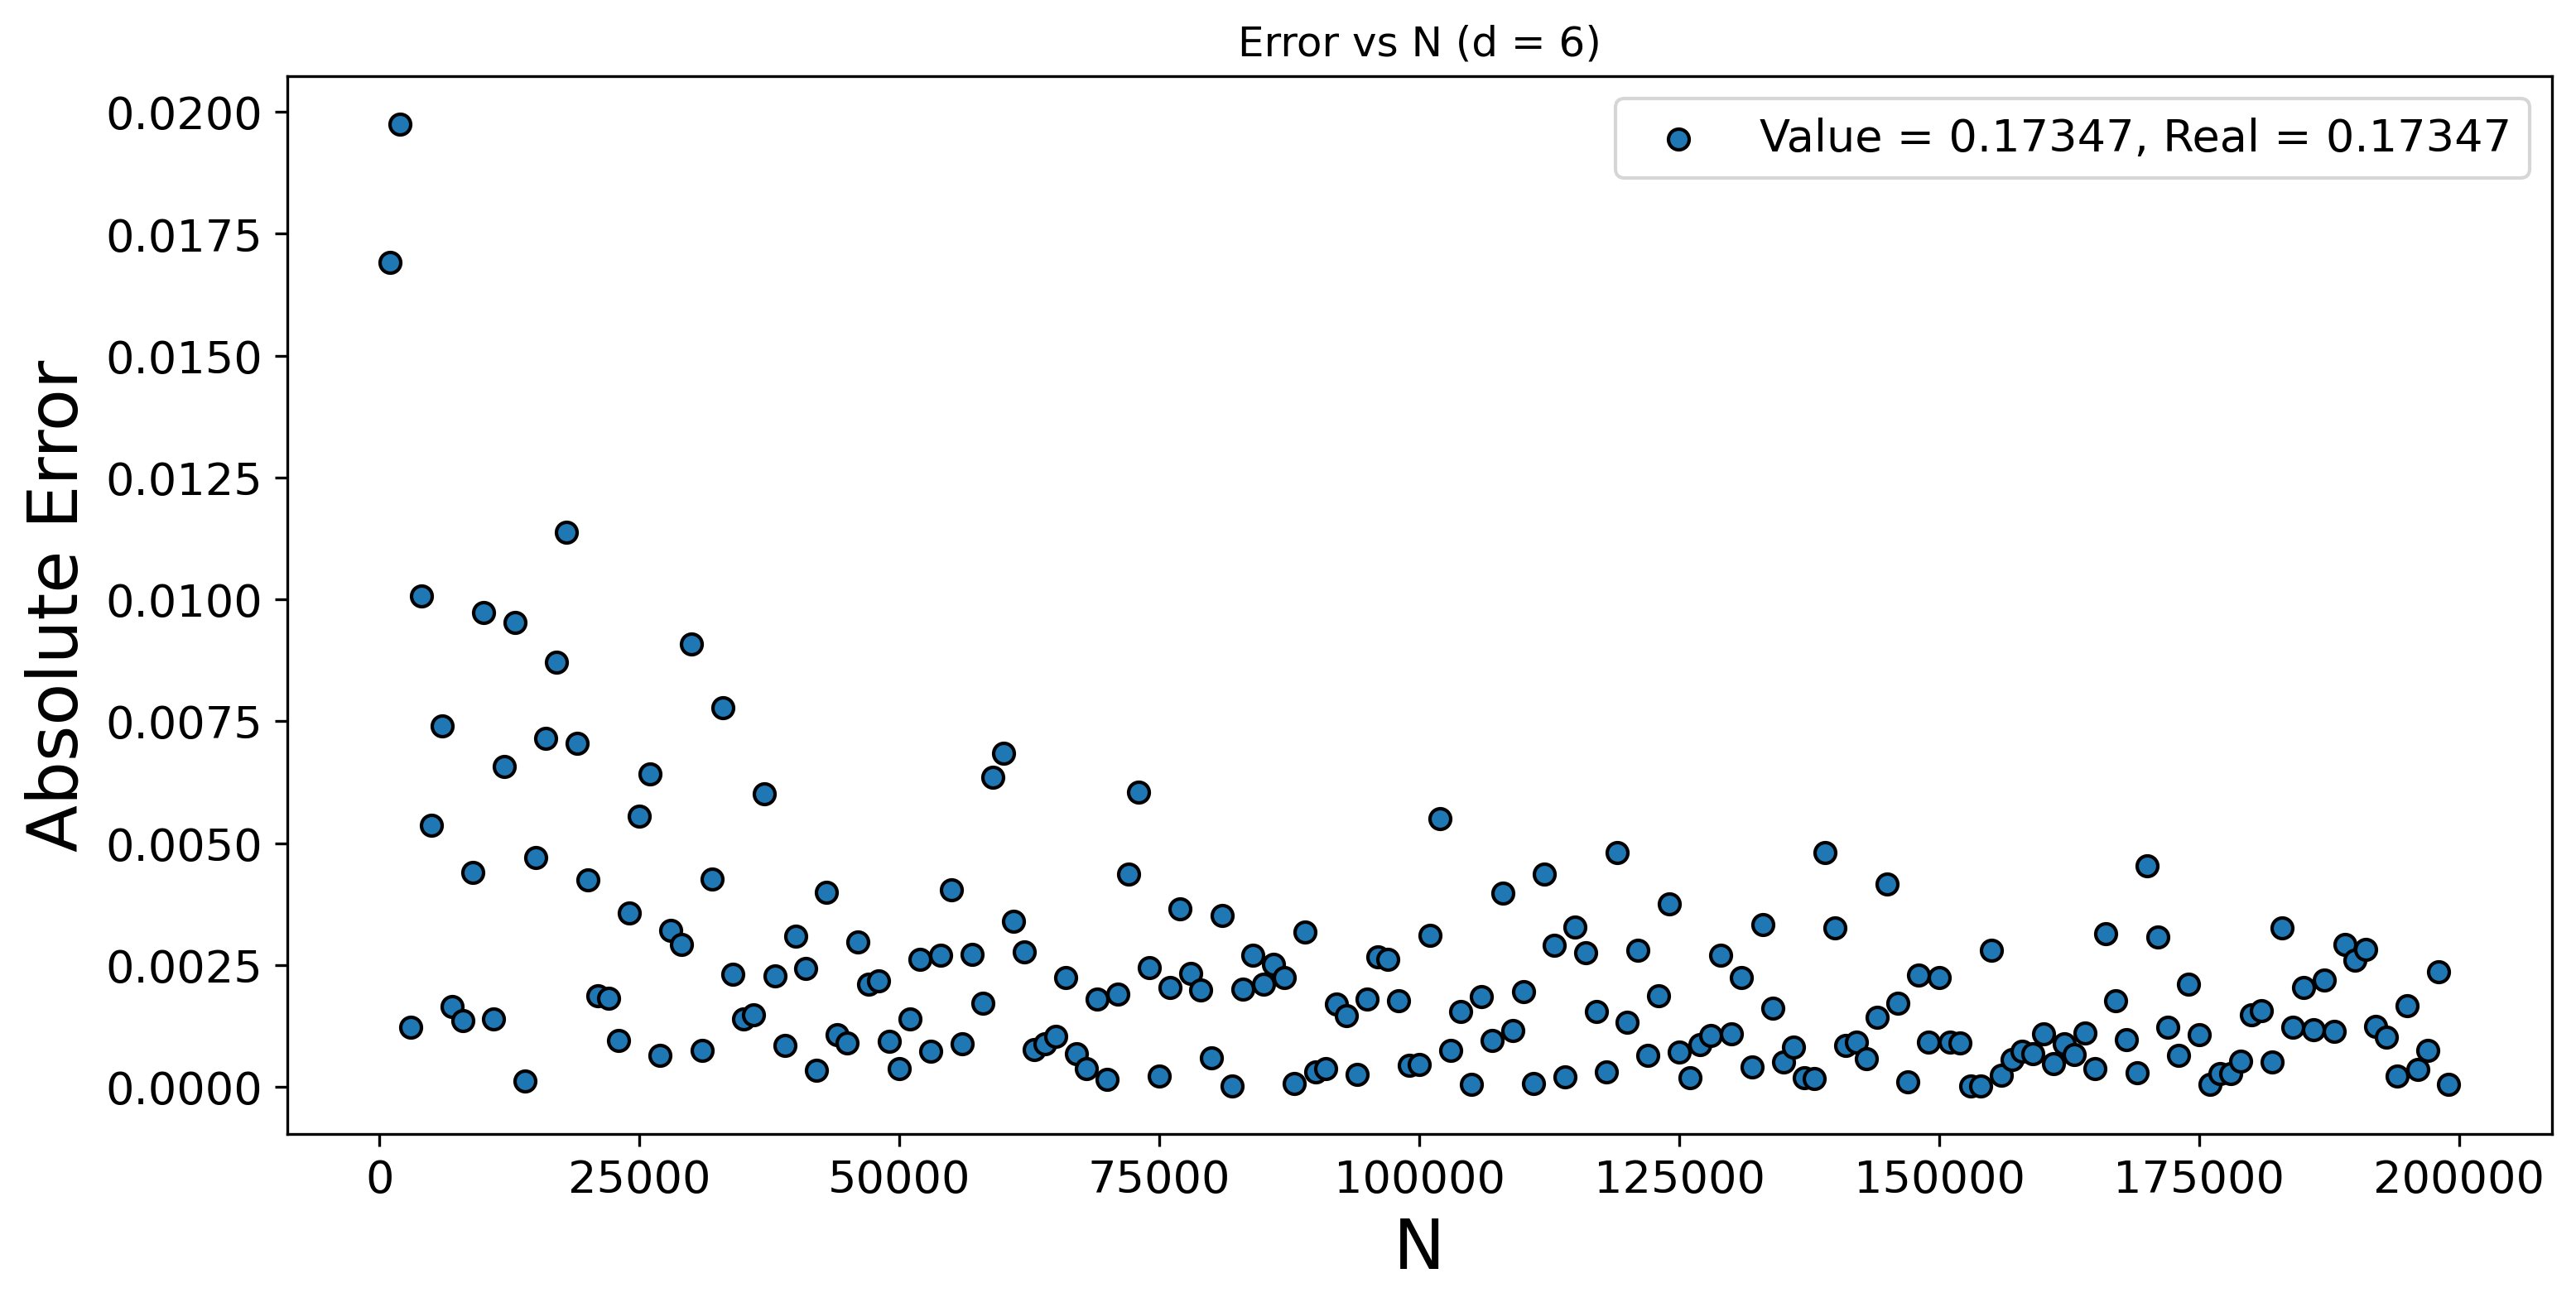

In [ ]:
#### Plot para d = 6
plt.figure(figsize=(10,5),dpi = 300)
plt.scatter(n, error6[:,0], c='tab:blue',edgecolors='k', label=f'Value = {error6[np.argmin(error6[:,0]),2]:.5f}, Real = {0.7468**d:.5f}') 
plt.title(f'Error vs N (d = {d})')
plt.legend(fontsize=13)
plt.tight_layout()
plt.ylabel('Absolute Error',fontdict={'fontsize': 20})
plt.xlabel('N',fontdict={'fontsize': 20})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(f'Q{d}.pdf', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0.1)
plt.show()


In [16]:
#### Para d = 10
d = 10
n = np.arange(1000, 200_000, 1000)
error10 = [Q4(int(i),d) for i in n]
error10 = np.array(error10)


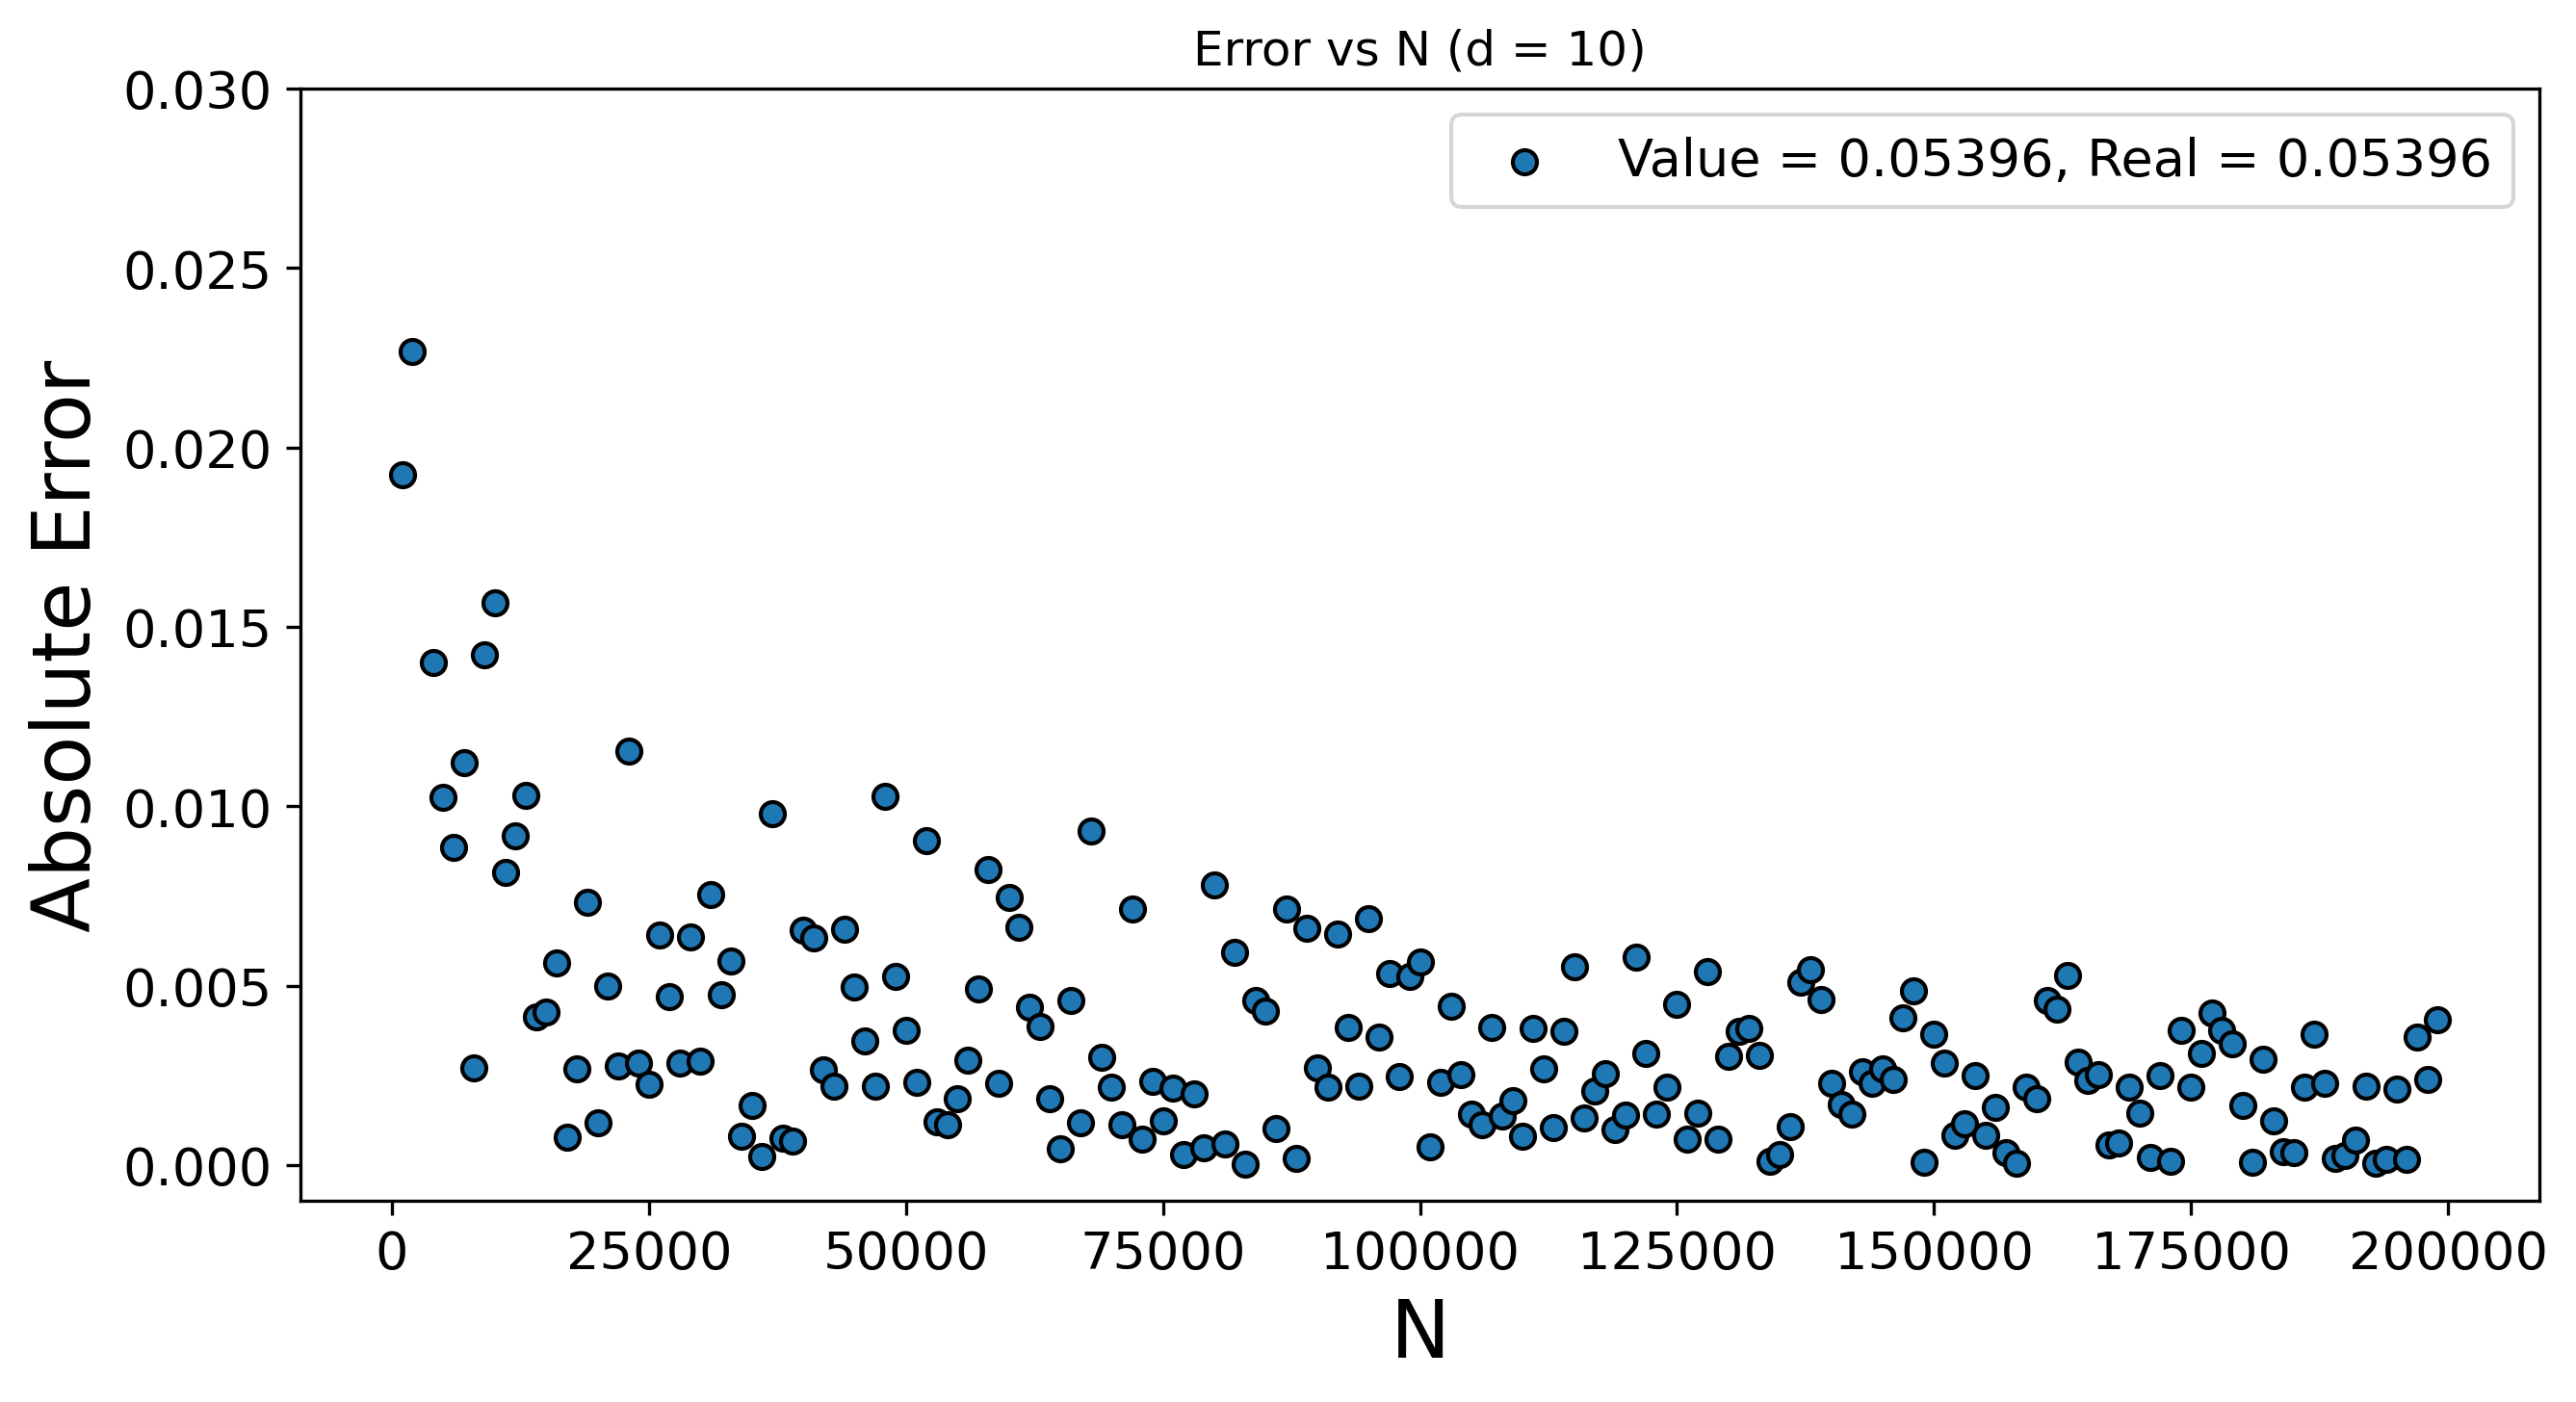

In [ ]:
#### Plot para d = 10
plt.figure(figsize=(10,5),dpi = 300)
plt.scatter(n, error10[:,0], c='tab:blue',edgecolors='k', label=f'Value = {error10[np.argmin(error10[:,0]),2]:.5f}, Real = {0.7468**d:.5f}') 
plt.legend(fontsize=13)
plt.title(f'Error vs N (d = {d})')
plt.ylabel('Absolute Error',fontdict={'fontsize': 20})
plt.xlabel('N',fontdict={'fontsize': 20})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.00100,0.030)
plt.savefig(f'Q{d}.pdf', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0.1)
plt.show()

In [18]:
#### Para d = 4
d = 4
n = np.arange(1000, 200_000, 1000)
error4 = [Q4(int(i),d) for i in n]
error4 = np.array(error4)


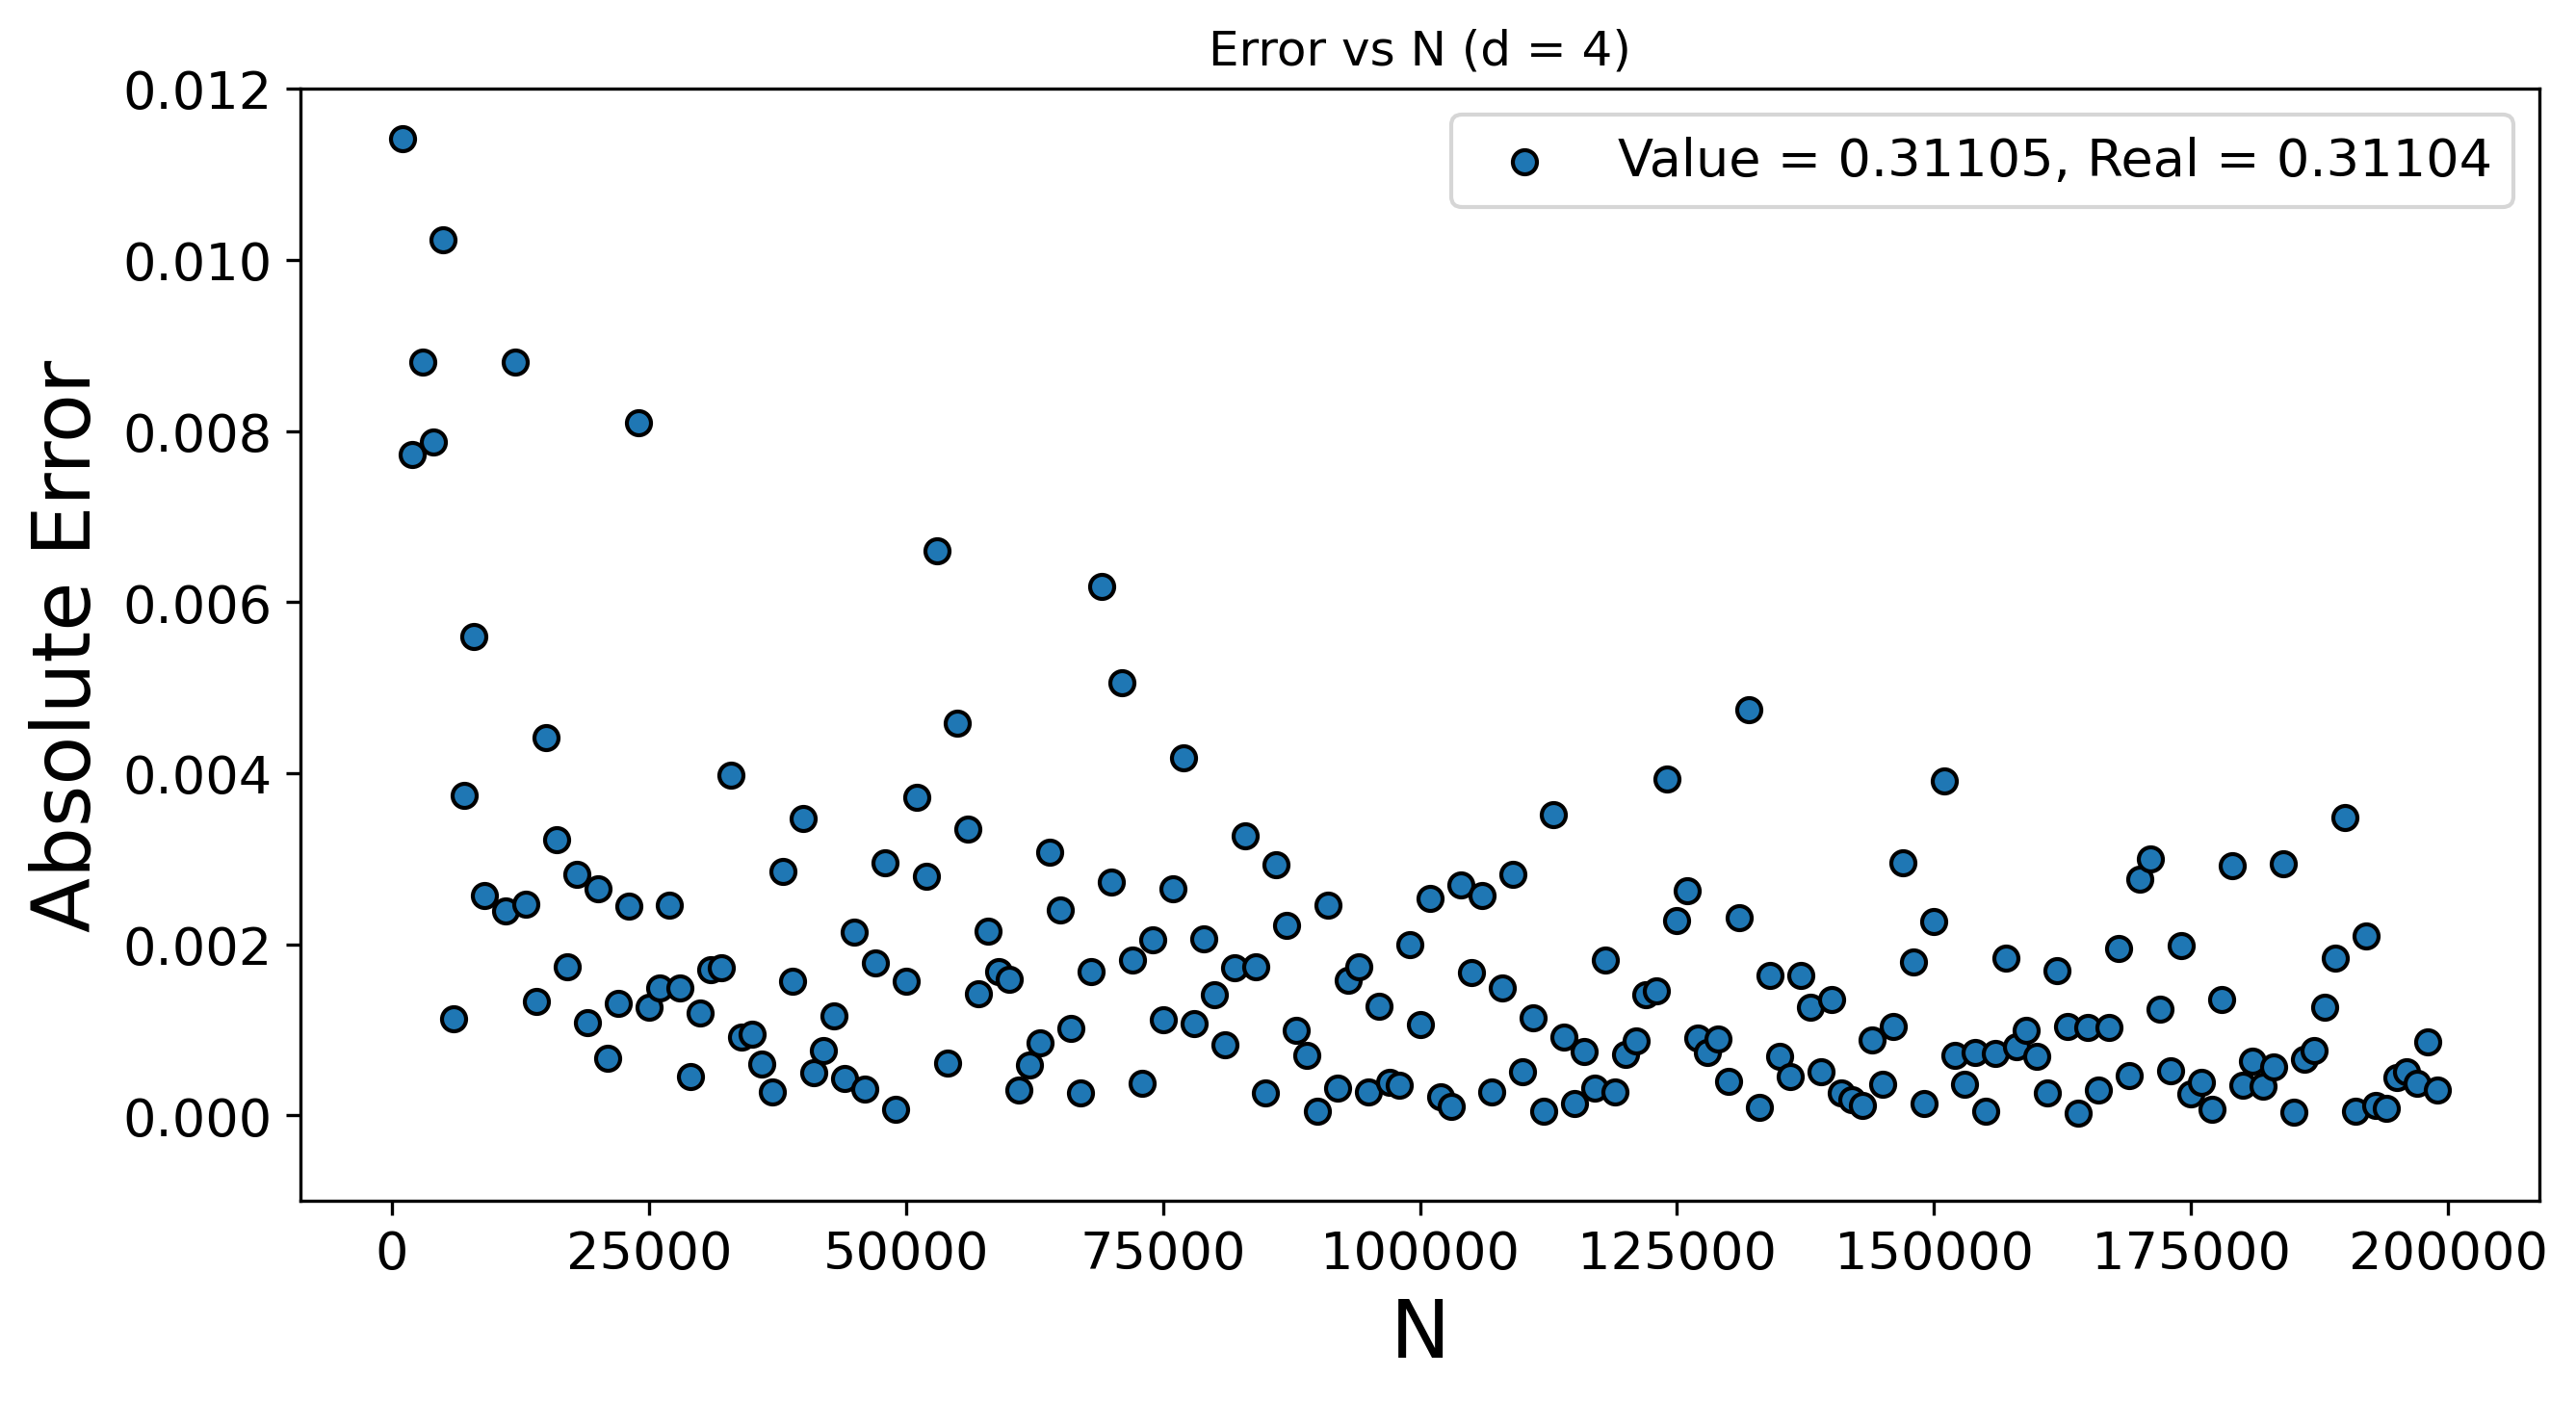

In [ ]:
#### Plot para d = 4
plt.figure(figsize=(10,5),dpi = 300)
plt.scatter(n, error4[:,0], c='tab:blue',edgecolors='k', label=f'Value = {error4[np.argmin(error4[:,0]),2]:.5f}, Real = {0.7468**d:.5f}') 
plt.legend(fontsize=13)
plt.title(f'Error vs N (d = {d})')
plt.ylabel('Absolute Error',fontdict={'fontsize': 20})
plt.xlabel('N',fontdict={'fontsize': 20})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.00100,0.012)
plt.savefig(f'Q{d}.pdf', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0.1)
plt.show()


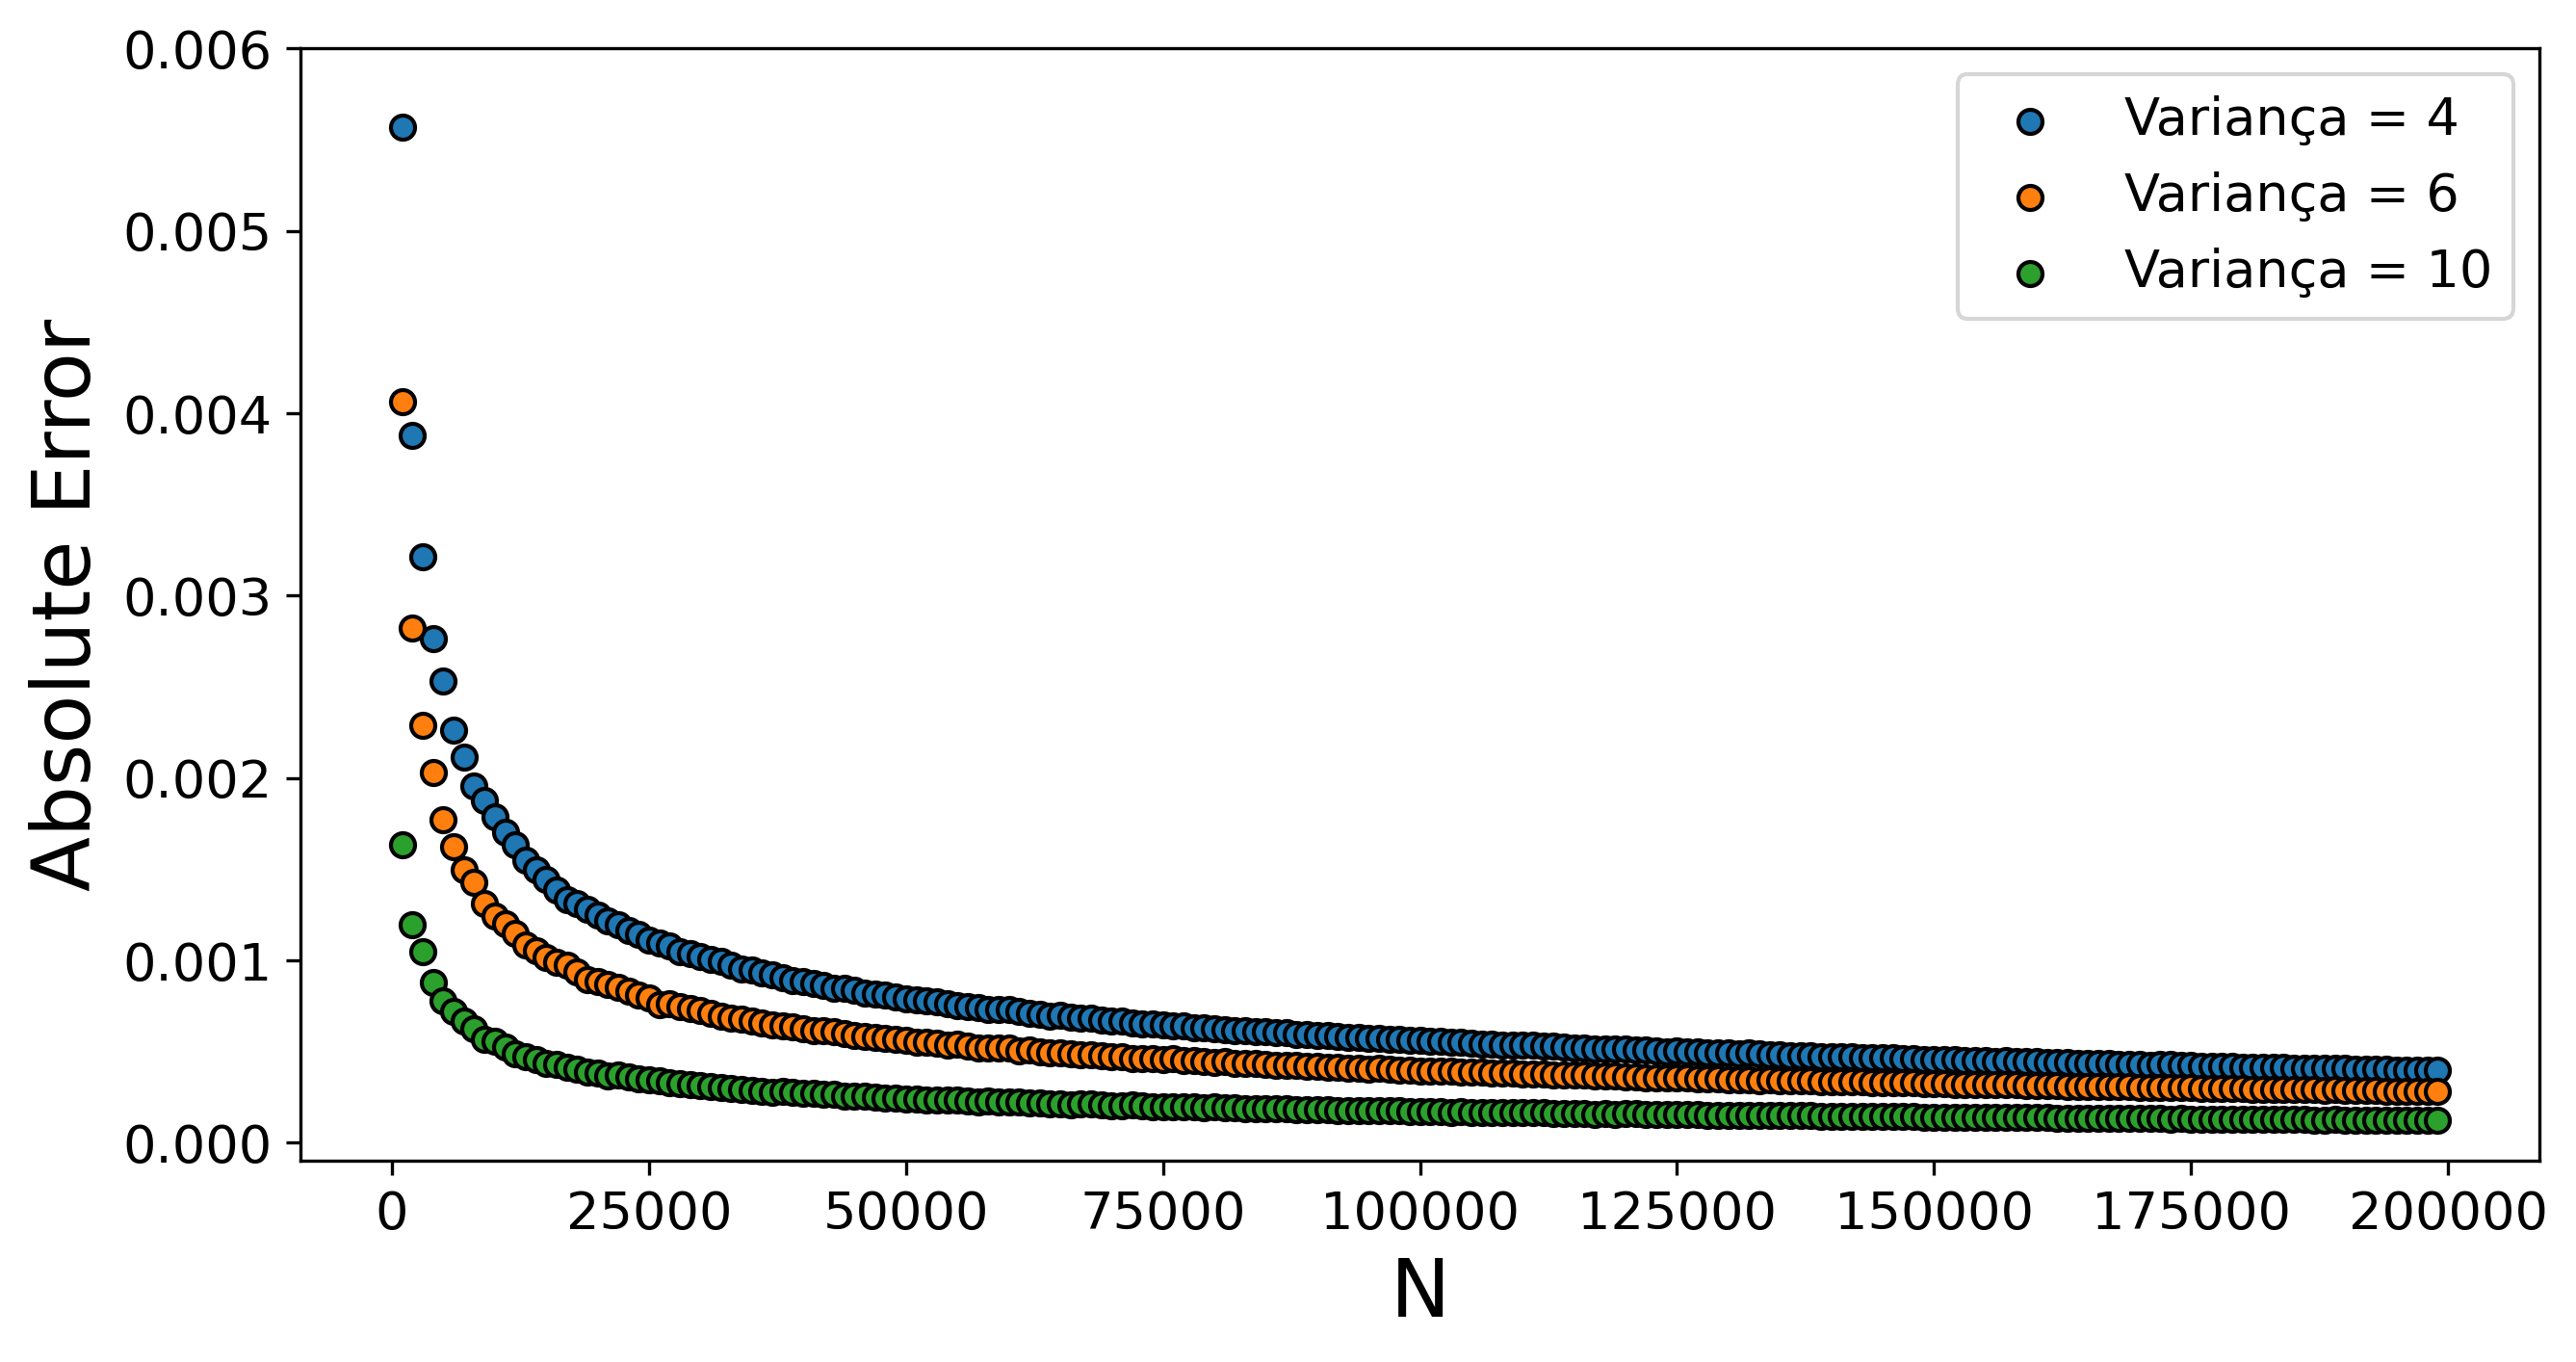

In [ ]:
plt.figure(figsize=(10,5),dpi = 300)
plt.scatter(n, error4[:,1],edgecolors='k', label=f'Variança = {4}')
plt.scatter(n, error6[:,1],edgecolors='k', label=f'Variança = {6}')
plt.scatter(n, error10[:,1],edgecolors='k', label=f'Variança = {10}')
plt.legend(fontsize=13)
plt.ylabel('Absolute Error',fontdict={'fontsize': 20})
plt.xlabel('N',fontdict={'fontsize': 20})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(-0.00010,0.006)
plt.savefig(f'erro.pdf', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0.1)
plt.show()


## Problema 5

Em física de partículas, distribuições angulares podem descrever a probabilidade de observação de partículas em diferentes direções após colisões de alta energia. Como exemplo, considere a reação de aniquilação entre um elétron e um pósitron para formar um par de múons ($\mu^+ \mu^-$). A probabilidade de observar um múon em um determinado ângulo $\theta$ (medido a partir da direção do elétron incidente) é proporcional a:

$P(\theta) \propto 1 + \cos^2(\theta), \quad 0 \leq \theta \leq \pi.$

Sob essas condições, o problema propõe a geração de amostras do ângulo $\theta$ cuja distribuição segue a função de probabilidade acima usando métodos de Monte Carlo.

1. **(a)** Normalize a distribuição de probabilidades $P(\theta)$, determinando o fator de normalização.

2. **(b)** Implemente um método de amostragem para gerar valores de $\theta$ que sigam $P(\cos \theta)$ utilizando métodos de Monte Carlo por rejeição, ou seja, sorteie ângulos $\theta$ uniformemente distribuídos em $[0, \pi]$. Assim, gere números aleatórios uniformes para decidir se cada $\theta$ proposto é aceito com base em sua probabilidade relativa $1 + \cos^2(\theta)$.

3. **(c)** Crie um histograma dos valores de $\theta$ obtidos e compare com a distribuição teórica $P(\theta)$. Compare seu resultado com a Figura 13.2 de [1].

4. **(d)** Calcule a média e a variância das amostras obtidas e compare com os valores teóricos para a distribuição normalizada.

5. **(e)** Realize testes estatísticos como Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras obtidas são consistentes com a distribuição teórica.


In [21]:
#### Realiza a amostragem
valores = []
M = 0.05
while(len(valores) < N):
    THETA = random.uniform(0, math.pi)
    if(M*F(THETA) > random.uniform(0, 1) ):
        valores.append(THETA)

In [22]:
#### Calcula o histograma
bins = 100
maximo = max(valores)
minimo = min(valores)
delta = (maximo - minimo)/bins
histograma = [0]*(bins+1)
# Calcula as bordas dos bins se necessário
bin_edges = np.array([minimo + i * delta for i in range(bins + 1)])

#print(histograma)
for valor in valores:
    histograma[int((valor - minimo)/delta)] += 1

#### Normaliza o histograma
histograma_normalizado  = [x/(N*delta) for x in histograma]


In [26]:
#### Integral numérica
theta = np.linspace(0, np.pi, N) 
delta_theta = theta[1] - theta[0]    
integral = np.sum(F(theta) * delta_theta)

#### Constante de normalização teórica
C_teorico = 1 / integral

print(f"Integral calculada: {integral}")
print(f"Constante de normalização teórica: {C_teorico}")


Integral calculada: 4.712395263576279
Constante de normalização teórica: 0.2122063078471671


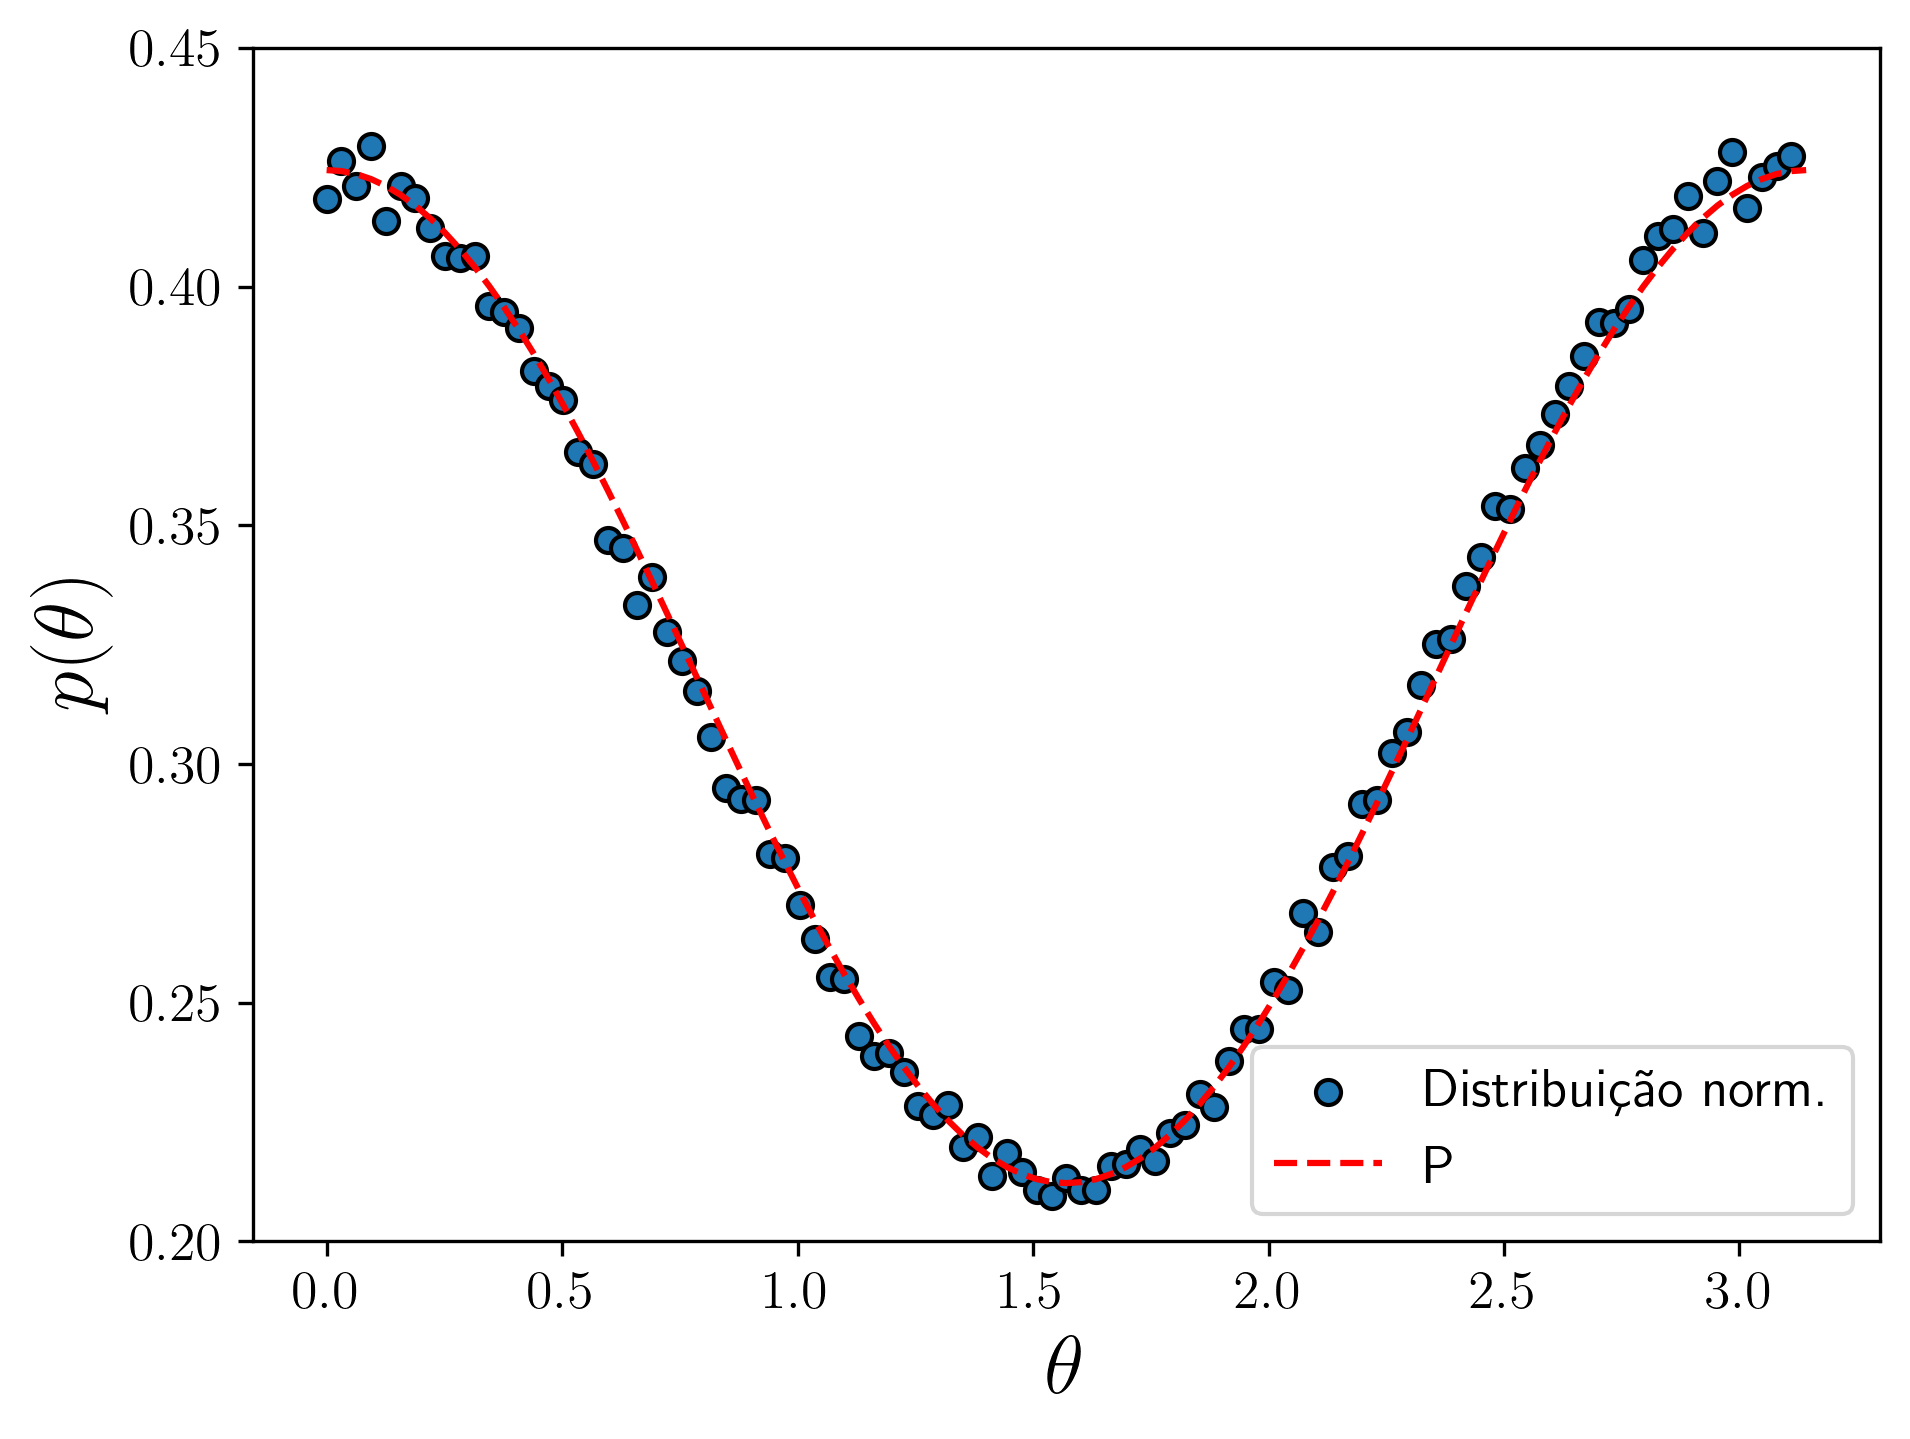

In [30]:
plt.figure(dpi=300)
# latex style
plt.rc('text', usetex=True)
plt.scatter(
    [minimo + i*delta for i in range(bins+1)][:-1], 
        histograma_normalizado[:-1],
    edgecolors='k',
    color = 'tab:blue',
    label = f'Distribuição norm.'
)
y = [P(minimo + i*delta, C_teorico) for i in range(bins+1)]
y = sum(y)
plt.plot(
    [minimo + i*delta for i in range(bins+1)],
    [P(minimo + i*delta, C_teorico) for i in range(bins+1)],
    '--',
    c = 'red',
    label ='P'
)
plt.legend(loc = 'best')
plt.xlabel(r'$\theta$', fontdict={'fontsize': 20})
plt.ylabel(r'$p(\theta)$', fontdict={'fontsize': 20})
#.title(rf'Distribuição de $\theta$, M = {M}')
plt.tight_layout()
plt.legend(fontsize=13)
#plt.ylabel('Absolute Error',fontdict={'fontsize': 20})
#plt.xlabel('N',fontdict={'fontsize': 20})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0.20,0.45)
plt.savefig(f'distribuicao_theta_{M}.pdf', dpi=300, bbox_inches='tight', transparent=True, pad_inches=0.1)
plt.show()

In [ ]:
# calculate mean of valores
print("Média e Variância da distribuição de theta")
mean = sum(valores)/N
# calculate the std
std = math.sqrt(sum([(x - mean)**2 for x in valores])/N)
var = sum([(x - mean)**2 for x in valores])/N
print(mean,var)
print("Média e Variância teórica da distribuição de theta")
x2 = 2/3*(math.pi*math.pi/3 + (2*math.pi*math.pi + 3)/12)
print(math.pi/2,x2 - pow(math.pi/2,2))


Média e Variância da distribuição de theta
1.572420496610817 0.9906323839280354
Média e Variância teórica da distribuição de theta
1.5707963267948966 0.9891337000907798


In [32]:
""" sample1 = histograma_normalizado
sample2 = [P(minimo + i*delta, C_teorico)/y for i in range(bins+1)] """

sample1 = histograma_normalizado[:-1]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centros dos bins
sample2 = [P(minimo + i * delta, C_teorico) / y for i in range(bins)]  # Tamanho deve ser igual a bins

In [33]:
d_statistic, p_value = ks_test_from_histogram(sample1, sample2, bin_edges)

# Resultados
print("Kolmogorov-Smirnov Test:")
print(f"Estatística D: {d_statistic}")
print(f"Valor-p: {p_value}")
print("Resultado:", "Consistente com a distribuição teórica" if p_value > 0.05 else "Diferente da distribuição teórica")


Kolmogorov-Smirnov Test:
Estatística D: 0.004001794744190157
Valor-p: 1.9967996909942476
Resultado: Consistente com a distribuição teórica


In [34]:
distribuicao = []
count = 0
for i in histograma[:-1]:
    count += 1
    distribuicao += [count]*i
teorico = []
count = 0
for i in [P(minimo + j*delta, C_teorico) for j in range(bins+1)][:-1]:
    count += 1
    teorico += [count]*math.floor(i*N*delta)


In [35]:
teorico = teorico[:len(distribuicao)]

In [ ]:
# Calcular a estatística qui-quadrado
chi2_stat = sum((o - e) ** 2 / e for o, e in zip(distribuicao, teorico))

# Determinar os graus de liberdade
df = len(distribuicao) - 1

# Calcular o p-valor
p_value = 1 - chi2_cdf(chi2_stat, df)

# Resultado final
print("Estatística Qui-Quadrado:", chi2_stat)
print("Graus de Liberdade:", df)
print("p-valor:", p_value)
# Check final com nível de significância
alpha = 0.05  # Nível de significância padrão
if p_value < alpha:
    print("Isso significa que há evidências suficientes para concluir que as distribuições observada e teórica são significativamente diferentes.")
else:
    print("Isso significa que não há evidências suficientes para concluir que as distribuições observada e teórica são significativamente diferentes.")


Estatística Qui-Quadrado: 5135.3288788747095
Graus de Liberdade: 999998
p-valor: 1.0
Isso significa que não há evidências suficientes para concluir que as distribuições observada e teórica são significativamente diferentes.
